# ¿Qué vende un coche? por *Carlos Horta* (carlosgim@gmail.com)


**Descripción del proyecto:**
Eres un analista en Crankshaft List, una plataforma en línea donde se publican cientos de anuncios gratuitos de vehículos diariamente. Tu objetivo es estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

**Pasos a seguir:**
Este proyecto comienza con el procesamiento de datos para identificar y abordar los valores faltantes mediante imputación o eliminación según corresponda. Luego, se generan nuevas columnas a partir de las existentes para realizar un análisis de datos más completo. A continuación, se lleva a cabo un análisis exploratorio de los datos para responder a la pregunta central de este proyecto: "¿Qué factores impactan más en el precio de venta de un vehículo usado?". Finalmente, se presentan las conclusiones generales del proyecto.


## Inicialización

In [1]:
# En este apartado se cargan las librerías del proyecto.
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

In [2]:
# Para revisar de manera visual los datos ausentes, se trabaja con la librería missingo.

!pip install missingno 

import missingno as msno

### Cargar datos

In [3]:
# Aquí se encuentra el archivo de datos convertido en un DataFrame.
try:
    vehicles = pd.read_csv('vehicles_us.csv')
except:
    vehicles = pd.read_csv('/datasets/vehicles_us.csv')   

### Explorar datos iniciales

El dataset de este trabajo está guardado con el nombre **vehicles** y contiene los siguientes 12 campos, todos relacionados al vehículo en cuestión:
- `price`: El precio del vehículo.
- `model_year`: El año de fabricación.
- `model`: El modelo.
- `condition`: La condición actual del vehículo. 
- `cylinders`: El número de cilindros.
- `fuel`: Si es de gasolina, diesel, etc.
- `odometer`: El millaje del vehículo cuando el anuncio fue publicado.
- `transmission`: El tipo de transmisión. 
- `type`: El tipo de carrocería.
- `paint_color`: El color de la carrocería.
- `is_4wd`: Si el vehículo tiene tracción a las 4 ruedas (tipo Booleano).
- `date_posted`: La fecha en la que el anuncio fue publicado.
- `days_listed`: El número de días desde la publicación hasta que se eliminó.

In [4]:
# Con el método info se obtiene el número y tipo de las columnas del conjunto de datos.
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Con respecto a los tipos de datos por columna es necesario realizar las siguientes modificaciones:

- `model_year`: Convertir de valores decimales a valores enteros.
- `cylinders`: Convertir de valores decimales a valores enteros.
- `odometer`: Convertir de valores decimales a valores enteros.
- `is_4wd`: Es necesario trabajar esta columna Booleana.
- `date_posted`: Esta columna podría convertirse a una de fechas con to_datetime, adicionalmente podría valorarse crear una columna para año, mes y día.

In [5]:
# con sample se puede observar un conjunto aleatorio de datos.
vehicles.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
26245,2995,2005.0,toyota corolla,excellent,4.0,gas,199000.0,automatic,sedan,silver,NaN,2018-08-02,5
25950,19978,2018.0,toyota camry,excellent,4.0,gas,62175.0,automatic,sedan,black,NaN,2019-04-17,9
43411,5500,2010.0,nissan altima,excellent,4.0,gas,145690.0,automatic,sedan,grey,NaN,2019-02-18,14
23101,13195,2011.0,ford f-150,good,6.0,gas,153000.0,automatic,pickup,white,1.0,2019-03-29,32
38535,4900,2005.0,ram 1500,excellent,8.0,gas,2.0,automatic,truck,blue,NaN,2019-01-21,21
34963,39263,2015.0,chevrolet silverado 2500hd,excellent,8.0,diesel,76523.0,automatic,truck,white,1.0,2018-09-09,23
48838,8500,2001.0,gmc sierra 1500,excellent,8.0,gas,186000.0,automatic,truck,orange,1.0,2019-02-21,8
16101,6995,2010.0,dodge grand caravan,good,6.0,gas,NaN,automatic,van,NaN,NaN,2018-12-18,6
31647,28000,2012.0,ram 2500,excellent,6.0,diesel,101000.0,manual,truck,silver,1.0,2019-01-19,53
40720,2500,2007.0,nissan altima,good,4.0,gas,240558.0,manual,sedan,red,NaN,2018-10-04,42


In [6]:
# Se eliminarán las columnas model y fuel por ser irrelevantes para los objetivos del proyecto.

vehicles = vehicles.drop(columns=['model', 'fuel'])

En una revisión rápida de la muestra de arriba se observa lo siguiente (además de los valores ausentes [NaN]):

- `model_year`: Los datos del año aparecen con decimal.
- `condition`: Parece todo en orden (podría valorarse crear una nueva columna asignando un número a cada valor).
- `cylinders`: El número de cilindros está en decimales.
- `odometer` — El millaje aparece con decimales, se observa un 0.0  y valores ausentes.
- `paint_color`: Además de los colores sólidos, aparece una opción llamada "custom".
- `is_4wd` — La columna es de tipo Booleano (entonces será necesario crear una columna nueva para colocar que el 0 significa que no tiene tracción en las 4 llantas y el 1 que sí tiene).

In [7]:
# Con la suma de los nulos podemos identificar los datos faltantes de las columnas
vehicles.isnull().sum()

price               0
model_year       3619
condition           0
cylinders        5260
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
vehicles.isnull().mean()*100

price            0.000000
model_year       7.023775
condition        0.000000
cylinders       10.208637
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

Estas son las conclusiones rápidas sobre los valores ausentes: 

-Existen 5 columnas con datos ausentes con números dispares entre sí. 

-Si se considera que los datos totales por columna son 51,525 podemos ver que casi el 50% de is_4wd son ausentes (que al ser Booleanos en realidad podría significar que no tienen tracción en las 4 ruedas y no necesariamente que son datos faltantes). 

-Será necesario revisar las otras 4 columnas con datos ausentes y verificar la naturaleza de la ausencia de datos. 

In [9]:
# Con nunique podemos identificar el número de valores únicos de cada columna
vehicles.nunique()

price            3443
model_year         68
condition           6
cylinders           7
odometer        17762
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted       354
days_listed       227
dtype: int64

Se puede observar una diversidad importante de valores únicos en la mayoría de las columnas, más adelante se tendrá que valorar si se hacen diferentes agrupaciones por columna para mejorar el análisis de las variables.

In [10]:
vehicles.describe(include='all')

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,46265.000000,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,6,NaN,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,excellent,NaN,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,24773,NaN,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,6.125235,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,1.660360,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,3.000000,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,4.000000,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,6.000000,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,8.000000,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


## Conclusiones del análisis exploratorio de datos

- **price**: La columna "price" cuenta con un total de 51,525 filas. Se observa un valor mínimo de $1 que requiere análisis adicional, ya que puede ser atípico. La media del precio es de $12,132 y la mediana es de $9,000. Probablemente, al corregir los valores mínimos, ambas medidas se vuelvan más similares. Actualmente, existen 3,443 valores únicos.

- **model_year**: La columna "model_year" tiene 3,619 valores nulos. El valor mínimo registrado es 1908, lo cual podría indicar la presencia de vehículos clásicos, aunque se debe investigar más, ya que el primer vehículo se creó solo 22 años antes (1886). La media del año de fabricación es 2009 y la mediana es 2011. Se registran en total 68 valores únicos.

- **condition**: La columna "condition" cuenta con todos los datos, pero al ser una cadena de texto, no es posible obtener otros datos estadísticos. Se observan 6 valores únicos.

- **cylinders**: Se registran 5,260 valores ausentes en la columna "cylinders". Tanto la media como la mediana indican la presencia de 6 cilindros en promedio. Los demás datos parecen coherentes.

- **odometer**: Faltan 7,892 datos en la columna "odometer". La media registrada es de 115,553 y la mediana es de 113,000. El valor mínimo es cero y el valor máximo es 990,000, lo cual representa un kilometraje alto. Sin embargo, no está claro si los valores están en millas o kilómetros.

- **transmission**: Los datos de la columna "transmission" parecen estar completos y coherentes.

- **type**: Los datos de la columna "type" están completos y se registran 13 valores únicos que representan diferentes tipos de carrocería. Sin embargo, es necesario revisar con mayor detalle esta columna, ya que el número de valores únicos podría deberse a errores de ortografía o categorías mal etiquetadas.

- **paint_color**: Faltan 9,267 filas de datos en la columna "paint_color". Se registran en total 12 valores únicos.

- **is_4wd**: Como se mencionó anteriormente, existen 25,953 valores ausentes en la columna "is_4wd", que es de tipo booleano. Se puede inferir que los valores ausentes son False.

- **date_posted**: No se observan datos faltantes en la columna "date_posted" y se registran en total 354 valores únicos. Será necesario crear nuevas columnas a partir de esta columna, como el día de la semana, el mes y el año.

- **days_listed**: No se observan datos faltantes en la columna "days_listed", lo que sugiere que todos los vehículos presentes en el dataframe ya han sido vendidos.

Adicionalmente, es necesario crear una nueva columna que indique la edad del vehículo en el momento en que se publicó el anuncio, y posiblemente otra columna que indique la fecha de venta.

### Conclusiones y siguientes pasos

En resumen, las columnas 'condition', 'cylinders', 'transmission' y 'type' parecen estar completas y contener datos coherentes. Las columnas 'date_posted' y 'days_listed' también parecen estar completas, pero se requerirá crear columnas adicionales a partir de ellas.

Las demás columnas deben ser analizadas individualmente, pero antes de eso, es fundamental abordar los valores ausentes en cada una de ellas.

## Tratar los valores ausentes (si hay)

Para revisar la presencia y distribución de datos faltantes se utilizará la biblioteca de Python **missingo** a partir de cuatro tipos de datos: un gráfico de barras, un diagrama de matriz, un mapa de calor y un dendograma. Los cuatro gráficos servirán de apoyo para identificar dónde ocurren los valores faltantes, el alcance y si alguno de los valores faltantes está correlacionado entre sí. 

<AxesSubplot:>

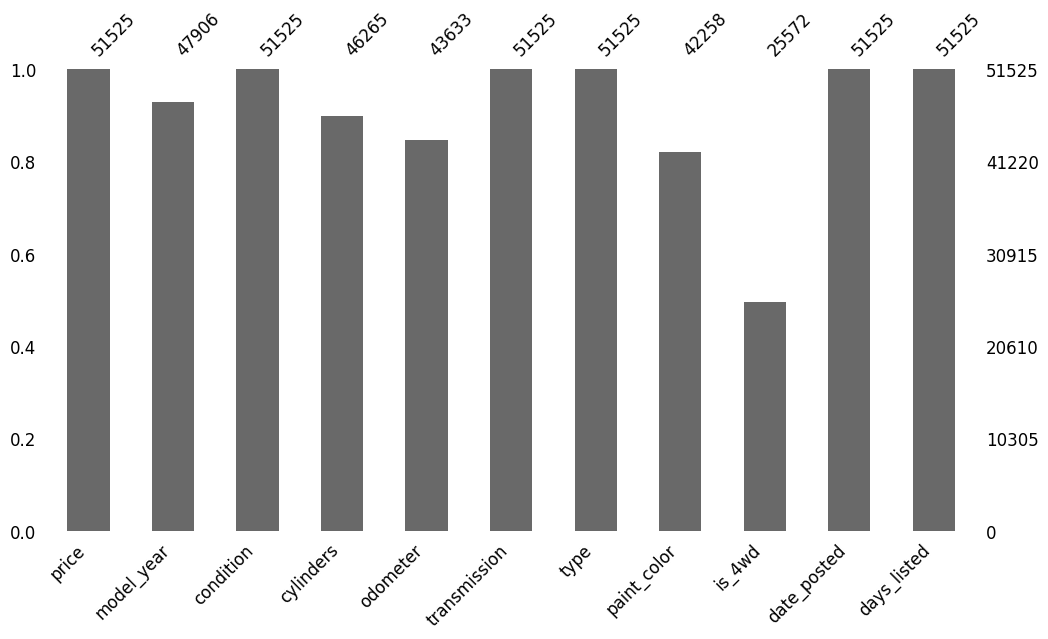

In [11]:
# La gráfica de barras proporciona un manera simple para mostrar que tan completa está la columna, o bien, cuántos valores nulos están presentes. Como se observa, son cinco las columnas con valores nulos.

msno.bar(vehicles, figsize=(12,6), fontsize=12)

<AxesSubplot:>

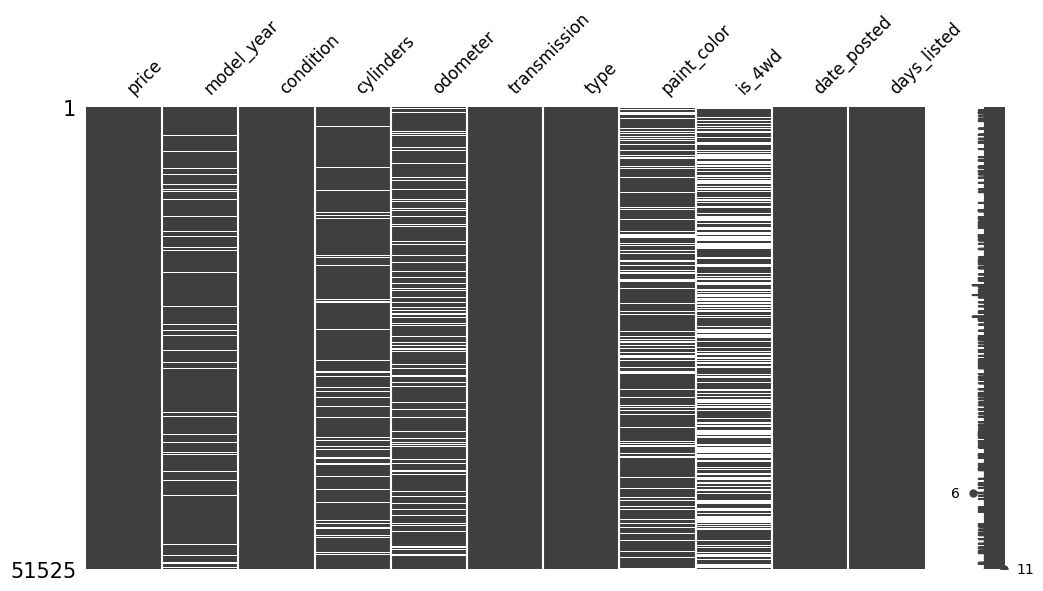

In [12]:
# Con el diagrama de matriz se puede visualizar de manera más clara la presencia (el sombreado en gris) o la ausencia (en blanco) de datos por columna,
# lo que permite revisar visualmente su distribución y posible correlación de ausencia entre columnas.

msno.matrix(vehicles, figsize=(12,6), fontsize=12)

<AxesSubplot:>

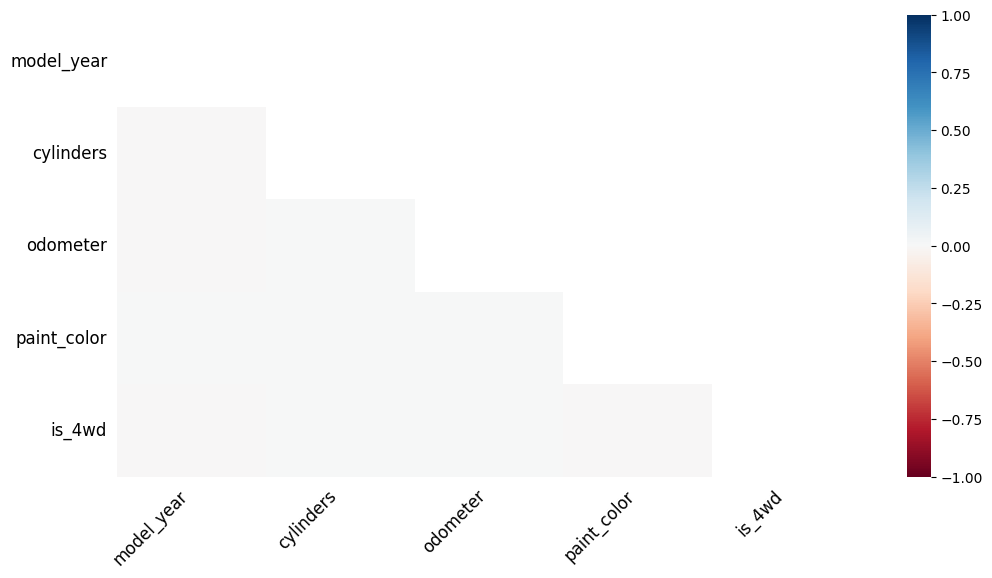

In [13]:
# Con el mapa de calor se pueden identificar las correlaciones de nulidad entre cada una de las columnas. Como se observa en el gráfico, todas las columnas están cercanos a cero, 
# lo que indica que existe poca o ninguna relación entre la presencia de valores nulos en una columna en comparación con otra.

msno.heatmap(vehicles, figsize=(12,6), fontsize=12)

<AxesSubplot:>

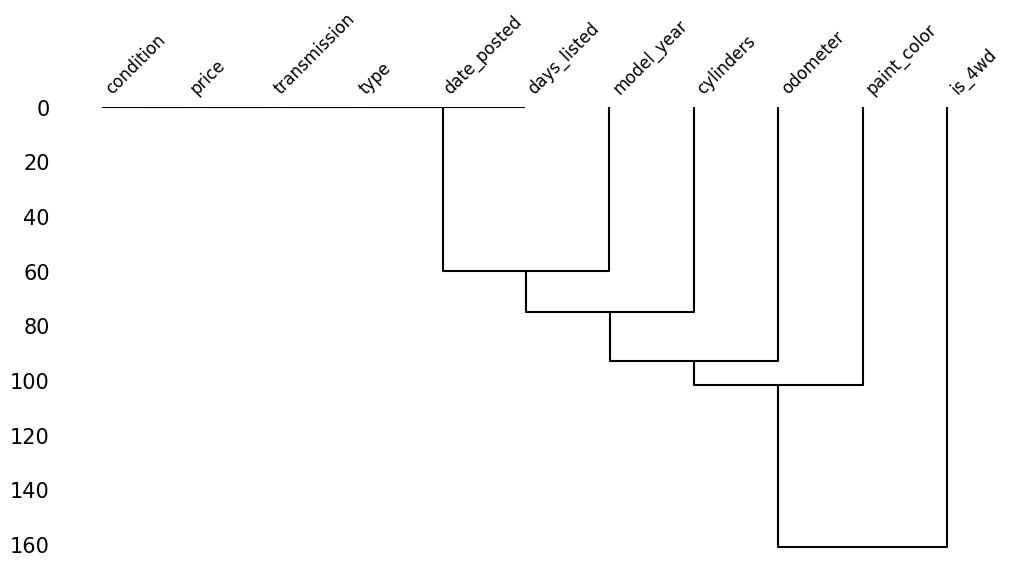

In [14]:
# Por último, el diagrama de dendograma nos señala la agrupación de columnas que tienen fuertes correlaciones en la nulidad.

msno.dendrogram(vehicles, figsize=(12,6), fontsize=12)

In [15]:
# Se revisará si existen duplicados en los datos del dataframe
vehicles.duplicated().sum()

0

No se encontraron datos duplicados entre las diferentes filas del dataframe.

Como ya se ha visto hasta el momento, existen cinco columnas con datos ausentes, por lo cual se revisará la naturaleza de dichos datos faltantes. Se hará una lista con las cinco columnas y luego se revisará las distribuciones.

In [16]:
relevant_columns = ['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd']
vehicles[relevant_columns].values.tolist()

[[2011.0, 6.0, 145000.0, nan, 1.0],
 [nan, 6.0, 88705.0, 'white', 1.0],
 [2013.0, 4.0, 110000.0, 'red', nan],
 [2003.0, 8.0, nan, nan, nan],
 [2017.0, 4.0, 80903.0, 'black', nan],
 [2014.0, 6.0, 57954.0, 'black', 1.0],
 [2015.0, 4.0, 79212.0, 'white', nan],
 [2013.0, 6.0, 109473.0, 'black', 1.0],
 [2012.0, 4.0, 104174.0, nan, 1.0],
 [2008.0, nan, 147191.0, 'blue', 1.0],
 [2011.0, 8.0, 128413.0, 'black', 1.0],
 [2012.0, 4.0, 111142.0, 'grey', nan],
 [2012.0, 8.0, 140742.0, nan, 1.0],
 [2018.0, 4.0, 22104.0, 'silver', nan],
 [2009.0, 8.0, 132285.0, 'black', 1.0],
 [2013.0, 8.0, nan, 'red', 1.0],
 [2010.0, 8.0, 130725.0, 'red', 1.0],
 [2014.0, 6.0, 100669.0, 'red', 1.0],
 [2013.0, 6.0, 128325.0, 'white', 1.0],
 [2018.0, 4.0, 31932.0, 'red', nan],
 [nan, 8.0, 147485.0, 'silver', 1.0],
 [2007.0, 6.0, 154000.0, nan, nan],
 [2004.0, 8.0, 180000.0, 'red', 1.0],
 [2004.0, 6.0, nan, 'red', 1.0],
 [2009.0, 4.0, nan, 'red', nan],
 [2017.0, 4.0, nan, nan, nan],
 [2014.0, 4.0, 79523.0, 'red', nan],


In [17]:
print(vehicles.dropna()[relevant_columns].value_counts(normalize=True))
print(vehicles[relevant_columns].value_counts(normalize=True))

model_year  cylinders  odometer  paint_color  is_4wd
2016.0      6.0        47570.0   white        1.0       0.001616
2017.0      6.0        30339.0   brown        1.0       0.001414
2013.0      4.0        60150.0   brown        1.0       0.001347
2014.0      6.0        73711.0   white        1.0       0.001347
2013.0      4.0        46150.0   black        1.0       0.001212
                                                          ...   
2007.0      8.0        209000.0  silver       1.0       0.000067
                       213000.0  brown        1.0       0.000067
                       213368.0  white        1.0       0.000067
                       213939.0  white        1.0       0.000067
2019.0      10.0       26504.0   red          1.0       0.000067
Length: 10909, dtype: float64
model_year  cylinders  odometer  paint_color  is_4wd
2016.0      6.0        47570.0   white        1.0       0.001616
2017.0      6.0        30339.0   brown        1.0       0.001414
2013.0      4.0    

**Conclusión de los datos aleatorios:** Después de analizar las cinco columnas con datos ausentes, se ha determinado que los valores faltantes son aleatorios. No se observa ninguna diferencia significativa entre las distribuciones de las variables. Esto sugiere que los datos faltantes no siguen un patrón específico y no están relacionados con otras variables del conjunto de datos.

**Columna 'model_year'**

In [18]:
vehicles['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [19]:
vehicles['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

**Conclusión intermedia de la columna 'model_year':** Después de examinar las medidas estadísticas y contar los valores, se puede asumir que la mejor manera de sustituir los datos faltantes es utilizando la mediana de los datos (2011), en lugar de la media (2009), debido a la presencia de valores extremos en la columna. Hay vehículos registrados con años tan tempranos como 1908, 1929, 1936, 1948, 1961, entre otros.

Por lo tanto, se procederá a imputar los valores faltantes de esta columna utilizando la mediana (2011) como sustituto.

In [20]:
# Es necesario rellenar los valores ausentes con la mediana de los datos (2011)

vehicles['model_year'] = vehicles['model_year'].fillna(2011)

In [21]:
# Con el relleno de datos ya quedó sin valores ausentes la columna 'model_year', resta por cambiar el tipo de dato a número entero.

vehicles['model_year'].describe()

count    51525.000000
mean      2009.838234
std          6.065836
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

**Columna 'cylinders'**

In [22]:
vehicles['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [23]:
vehicles['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

**Conclusión intermedia de la columna 'cylinders':** Después de revisar las medidas estadísticas y contar los valores, se puede asumir que la mejor manera de sustituir los valores ausentes es utilizando el número 6 en el campo de cilindros, ya que tanto la media como la mediana muestran valores similares. 

Por lo tanto, se imputará esta columna con el número 6 como valor de sustitución.

In [24]:
# Es necesario rellenar los valores ausentes con la media y mediana de los datos (6)

vehicles['cylinders'] = vehicles['cylinders'].fillna(6)

In [25]:
# Con el relleno de datos ya quedó sin valores ausentes la columna 'cylinders', resta por cambiar el tipo de dato a número entero.

vehicles['cylinders'].describe()

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

**Columna 'odometer'**

In [26]:
vehicles['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [27]:
vehicles['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
138580.0      1
94624.0       1
123321.0      1
202627.0      1
139573.0      1
Name: odometer, Length: 17762, dtype: int64

Conclusión intermedia de la columna 'odometer': luego de revisar sus medidas estadísticas y de contar sus valores, se puede asumir que la mejor manera de sustituir los datos faltantes es con la mediana de los datos (que es 113,000). Aunque la media (115,553) no es tan distinta de la mediana, sí existen valores extremos a considerar.
Por lo tanto, se imputará con el valor de la mediana (113,000). 

In [28]:
vehicles['odometer'] = vehicles['odometer'].fillna(115553)

In [29]:
# Con el relleno de datos ya quedó sin valores ausentes la columna 'odometer', resta por cambiar el tipo de dato a número entero.

vehicles['odometer'].describe()

count     51525.000000
mean     115553.391014
std       59902.205520
min           0.000000
25%       79181.000000
50%      115553.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

**Columna 'paint_color'**

In [30]:
vehicles['paint_color'].describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

In [31]:
vehicles['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Conclusión intermedia de la columna 'paint_color': al ser una columna de datos categóricos se tomará el valor más frecuente (la moda) como valor para sustituir los valores ausentes.
Por lo tanto, con 'white' se realizará la sustitución de los valores faltantes.

In [32]:
vehicles['paint_color'] = vehicles['paint_color'].fillna('white')

In [33]:
# Con el relleno de datos ya quedó sin valores ausentes la columna 'paint_color'.

vehicles['paint_color'].describe()

count     51525
unique       12
top       white
freq      19296
Name: paint_color, dtype: object

**Columna is_4wd**

In [34]:
vehicles['is_4wd'].describe()

count    25572.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: is_4wd, dtype: float64

In [35]:
vehicles['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

Conclusión intermedia de la columna 'is_4wd': al ser una columna de datos Booleanos se asume que los valores ausentes son 'False'.
Por lo tanto, se convertirán los 'False' a 0 y los 'True' a 1.

In [36]:
vehicles['is_4wd'] = np.where(vehicles['is_4wd'].isnull(), pd.NA,
                              np.where(vehicles['is_4wd']==1, True, vehicles['is_4wd']))

In [37]:
vehicles['is_4wd'] = vehicles['is_4wd'].astype('boolean')

In [38]:
print(vehicles['is_4wd'])

0        True
1        True
2        <NA>
3        <NA>
4        <NA>
         ... 
51520    <NA>
51521    <NA>
51522    <NA>
51523    <NA>
51524    <NA>
Name: is_4wd, Length: 51525, dtype: boolean


In [39]:
vehicles['is_4wd'] = vehicles['is_4wd'].astype('Int64')

In [40]:
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)

In [41]:
vehicles['is_4wd'].head()

0    1
1    1
2    0
3    0
4    0
Name: is_4wd, dtype: Int64

In [42]:
vehicles.describe(include='all')

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,51525.000000,51525,51525.000000,51525.000000,51525,51525,51525,51525.000000,51525,51525.00000
unique,NaN,NaN,6,NaN,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,excellent,NaN,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,24773,NaN,NaN,46902,12405,19296,NaN,186,NaN
mean,12132.464920,2009.838234,NaN,6.112450,115553.391014,NaN,NaN,NaN,0.496303,NaN,39.55476
std,10040.803015,6.065836,NaN,1.573784,59902.205520,NaN,NaN,NaN,0.499991,NaN,28.20427
min,1.000000,1908.000000,NaN,3.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,0.00000
25%,5000.000000,2007.000000,NaN,4.000000,79181.000000,NaN,NaN,NaN,0.000000,NaN,19.00000
50%,9000.000000,2011.000000,NaN,6.000000,115553.000000,NaN,NaN,NaN,0.000000,NaN,33.00000
75%,16839.000000,2014.000000,NaN,8.000000,146541.000000,NaN,NaN,NaN,1.000000,NaN,53.00000


En este punto todas las columnas tienen datos completos (51,525 valores por columna); en este apartado se trabajaron cinco columnas: 

**'model_year'**: Los datos faltantes se imputaron con la mediana de los datos (2011) en lugar de la media (2009) debido a los valores extremos de la columna (1908,1929,1936,1948, entre otros).

**'cylinders'**: Los datos faltantes se imputaron con la media y mediana de los datos (que fue 6 en ambas).

**'odometer'**: En esta columna los datos faltantes se imputaron con la cifra 113,00 que fue la mediana de los datos; aunque la media (115,553) no estuvo tan alejada de la mediana, sí había valores extremos a considerar.

**'paint_color'**: Al ser una columna de datos categóricos se tomó el valor más frecuente, o sea la moda, para sustituir los valores ausentes. En esta columna existen 12 colores únicos y el más frecuente fue el color blanco (white) por lo que con éste se sustituyó los datos faltantes.

**'is_4wd'**: Esta columna de datos booleanos se asumió que los valores ausentes son 'False', por lo tanto se conviertieron los 'False' a 0 y los 'True' a 1.


Como tarea siguiente está el cambio de tipo de columno al más adecuado para su análisis.

## Corregir los tipos de datos

Una vez imputados los valores ausentes en todas las columnas, será necesario cambiar los tipos de datos a los más convenvientes.

In [43]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   condition     51525 non-null  object 
 3   cylinders     51525 non-null  float64
 4   odometer      51525 non-null  float64
 5   transmission  51525 non-null  object 
 6   type          51525 non-null  object 
 7   paint_color   51525 non-null  object 
 8   is_4wd        51525 non-null  Int64  
 9   date_posted   51525 non-null  object 
 10  days_listed   51525 non-null  int64  
dtypes: Int64(1), float64(3), int64(2), object(5)
memory usage: 4.4+ MB


In [44]:
# Antes de iniciar el cambio de las columnas se revisará si existen filas duplicadas

vehicles.duplicated().sum()

# Como se observa no existen filas duplicadas, se iniciará el cambio de columnas.

0

In [45]:
vehicles.head(10)

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,good,6.0,145000.0,automatic,SUV,white,1,2018-06-23,19
1,25500,2011.0,good,6.0,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,like new,4.0,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,fair,8.0,115553.0,automatic,pickup,white,0,2019-03-22,9
4,14900,2017.0,excellent,4.0,80903.0,automatic,sedan,black,0,2019-04-02,28
5,14990,2014.0,excellent,6.0,57954.0,automatic,sedan,black,1,2018-06-20,15
6,12990,2015.0,excellent,4.0,79212.0,automatic,sedan,white,0,2018-12-27,73
7,15990,2013.0,excellent,6.0,109473.0,automatic,SUV,black,1,2019-01-07,68
8,11500,2012.0,excellent,4.0,104174.0,automatic,SUV,white,1,2018-07-16,19
9,9200,2008.0,excellent,6.0,147191.0,automatic,SUV,blue,1,2019-02-15,17


In [46]:
# Las columnas 'model_year', 'cylinders', 'odometer' se convertirán a valores enteros

vehicles['model_year'] = vehicles['model_year'].astype('int64')
vehicles['cylinders'] = vehicles['cylinders'].astype('int64')
vehicles['odometer'] = vehicles['odometer'].astype('int64')

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   condition     51525 non-null  object
 3   cylinders     51525 non-null  int64 
 4   odometer      51525 non-null  int64 
 5   transmission  51525 non-null  object
 6   type          51525 non-null  object
 7   paint_color   51525 non-null  object
 8   is_4wd        51525 non-null  Int64 
 9   date_posted   51525 non-null  object
 10  days_listed   51525 non-null  int64 
dtypes: Int64(1), int64(5), object(5)
memory usage: 4.4+ MB


In [47]:
# Por último, se convertirá date_posted a una columna de tipo fecha

vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   condition     51525 non-null  object        
 3   cylinders     51525 non-null  int64         
 4   odometer      51525 non-null  int64         
 5   transmission  51525 non-null  object        
 6   type          51525 non-null  object        
 7   paint_color   51525 non-null  object        
 8   is_4wd        51525 non-null  Int64         
 9   date_posted   51525 non-null  datetime64[ns]
 10  days_listed   51525 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), int64(5), object(4)
memory usage: 4.4+ MB


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial!

## Enriquecer datos

En este apartado de enriquecimiento de datos, se crearán nuevas columnas que permitirá un análisis más fino y profundo en el siguiente apartado.

In [48]:
# Así se encuentra el dataframe hasta el momento

vehicles.head()

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,good,6,145000,automatic,SUV,white,1,2018-06-23,19
1,25500,2011,good,6,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,like new,4,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,fair,8,115553,automatic,pickup,white,0,2019-03-22,9
4,14900,2017,excellent,4,80903,automatic,sedan,black,0,2019-04-02,28


In [49]:
# Se creará una columna denominada 'date_eliminated" que toma de base 'date_posted' y le suma los datos de 'days_listed' para así crear la nueva columna 
vehicles['date_eliminated'] = vehicles['date_posted'] + pd.to_timedelta(vehicles['days_listed'],unit='D')
vehicles

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_eliminated
0,9400,2011,good,6,145000,automatic,SUV,white,1,2018-06-23,19,2018-07-12
1,25500,2011,good,6,88705,automatic,pickup,white,1,2018-10-19,50,2018-12-08
2,5500,2013,like new,4,110000,automatic,sedan,red,0,2019-02-07,79,2019-04-27
3,1500,2003,fair,8,115553,automatic,pickup,white,0,2019-03-22,9,2019-03-31
4,14900,2017,excellent,4,80903,automatic,sedan,black,0,2019-04-02,28,2019-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,like new,6,88136,automatic,sedan,black,0,2018-10-03,37,2018-11-09
51521,2700,2002,salvage,4,181500,automatic,sedan,white,0,2018-11-14,22,2018-12-06
51522,3950,2009,excellent,4,128000,automatic,sedan,blue,0,2018-11-15,32,2018-12-17
51523,7455,2013,good,4,139573,automatic,sedan,black,0,2018-07-02,71,2018-09-11


In [50]:
# De la columna 'date_posted' se extraerá el día de la semana, mes y año de cuando se colocó el anuncio

vehicles['day_posted'] = pd.DatetimeIndex(vehicles['date_posted']).day
vehicles['month_posted'] = pd.DatetimeIndex(vehicles['date_posted']).month
vehicles['year_posted'] = pd.DatetimeIndex(vehicles['date_posted']).year
vehicles

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_eliminated,day_posted,month_posted,year_posted
0,9400,2011,good,6,145000,automatic,SUV,white,1,2018-06-23,19,2018-07-12,23,6,2018
1,25500,2011,good,6,88705,automatic,pickup,white,1,2018-10-19,50,2018-12-08,19,10,2018
2,5500,2013,like new,4,110000,automatic,sedan,red,0,2019-02-07,79,2019-04-27,7,2,2019
3,1500,2003,fair,8,115553,automatic,pickup,white,0,2019-03-22,9,2019-03-31,22,3,2019
4,14900,2017,excellent,4,80903,automatic,sedan,black,0,2019-04-02,28,2019-04-30,2,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,like new,6,88136,automatic,sedan,black,0,2018-10-03,37,2018-11-09,3,10,2018
51521,2700,2002,salvage,4,181500,automatic,sedan,white,0,2018-11-14,22,2018-12-06,14,11,2018
51522,3950,2009,excellent,4,128000,automatic,sedan,blue,0,2018-11-15,32,2018-12-17,15,11,2018
51523,7455,2013,good,4,139573,automatic,sedan,black,0,2018-07-02,71,2018-09-11,2,7,2018


In [51]:
# Se agrega el número de años que el vehículo tenía cuando el anuncio se colocó

vehicles['age_when_posted'] = vehicles['year_posted'] - vehicles['model_year']
vehicles

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_eliminated,day_posted,month_posted,year_posted,age_when_posted
0,9400,2011,good,6,145000,automatic,SUV,white,1,2018-06-23,19,2018-07-12,23,6,2018,7
1,25500,2011,good,6,88705,automatic,pickup,white,1,2018-10-19,50,2018-12-08,19,10,2018,7
2,5500,2013,like new,4,110000,automatic,sedan,red,0,2019-02-07,79,2019-04-27,7,2,2019,6
3,1500,2003,fair,8,115553,automatic,pickup,white,0,2019-03-22,9,2019-03-31,22,3,2019,16
4,14900,2017,excellent,4,80903,automatic,sedan,black,0,2019-04-02,28,2019-04-30,2,4,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,like new,6,88136,automatic,sedan,black,0,2018-10-03,37,2018-11-09,3,10,2018,5
51521,2700,2002,salvage,4,181500,automatic,sedan,white,0,2018-11-14,22,2018-12-06,14,11,2018,16
51522,3950,2009,excellent,4,128000,automatic,sedan,blue,0,2018-11-15,32,2018-12-17,15,11,2018,9
51523,7455,2013,good,4,139573,automatic,sedan,black,0,2018-07-02,71,2018-09-11,2,7,2018,5


In [52]:
# Se agrega el millaje promedio del vehículo por año y se convertirá a número entero en pos de un manejo más eficiente de los promedios 

vehicles['odometer_mean'] = vehicles['odometer'] / vehicles['age_when_posted']

<AxesSubplot:>

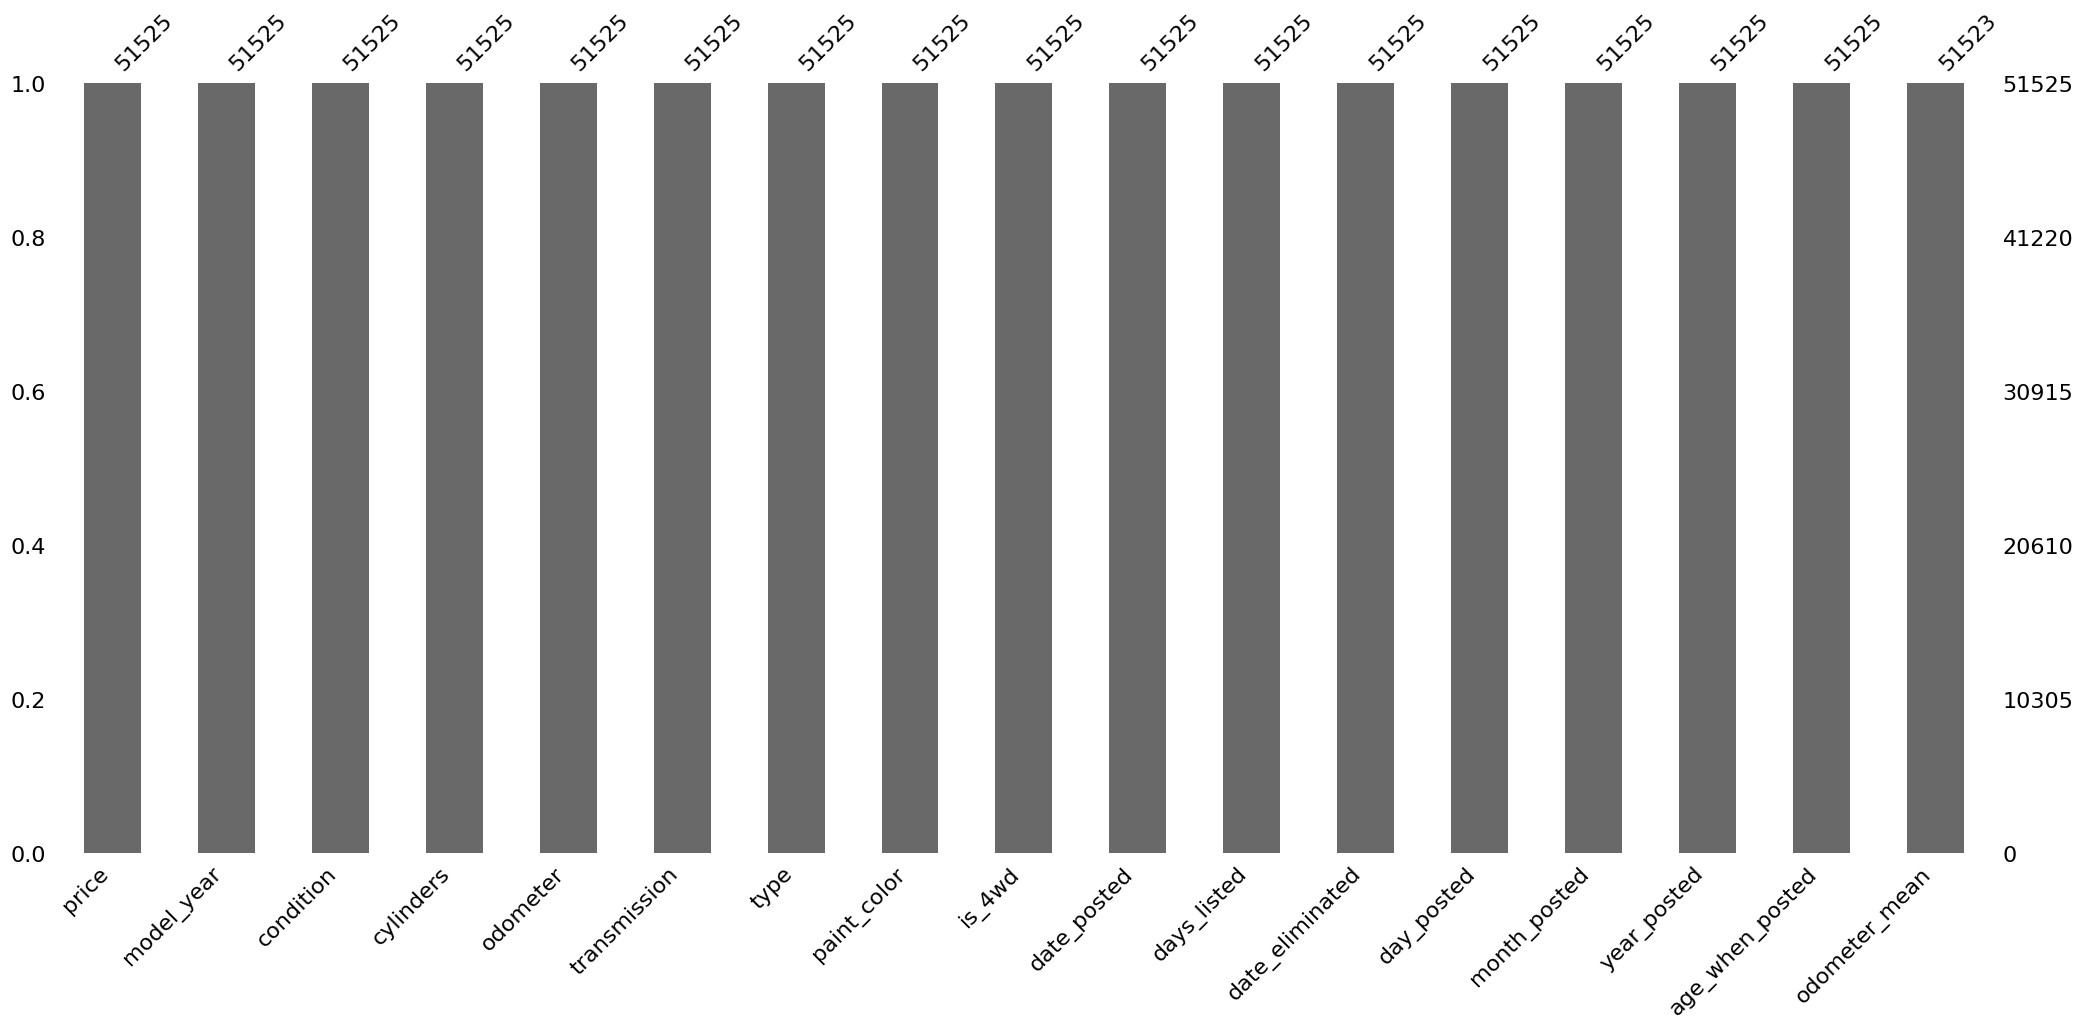

In [53]:
# Es necesario verificar si existe algún número de valores ausentes dentro de las nuevas columnas porque existía en la columna 'odometer' filas con valor cero, 
# por lo que podría traer problemas a la nueva columna de promedio

msno.bar(vehicles)

## Enriquecimiento de datos del dataframe

- **Valores duplicados:** Se ha determinado que no hay duplicados entre las filas del dataframe.

- **date_eliminated:** Se ha creado esta columna utilizando la información de 'date_posted' (la fecha de publicación del anuncio, incluyendo año, mes y día) y 'days_listed' (el número de días que el anuncio estuvo activo). La nueva columna 'date_eliminated' contiene la fecha completa de eliminación del anuncio.

- **day_posted, month_posted, year_posted:** Se han agregado estas tres columnas a partir de 'date_posted'. 'day_posted' representa el día de publicación del anuncio, 'month_posted' representa el mes y 'year_posted' representa el año.

- **age_when_posted:** Esta columna se ha creado utilizando 'year_posted' y 'model_year'. Indica la edad del vehículo en años en el momento en que se publicó el anuncio.

- **odometer_mean:** Se ha añadido esta columna para calcular el promedio de kilometraje del vehículo por año. El valor se muestra como un número entero.

- **Valores ausentes:** Después de la creación de todas las columnas, se ha verificado la presencia de valores faltantes en el dataframe. No se han encontrado valores ausentes en ninguna columna.

In [54]:
vehicles_nan = vehicles[vehicles.isna().any(axis=1)]
vehicles_nan

# Existen dos vehículos de condición excelente cuyo kilometraje está en cero, por lo que marca un error en el promedio del odómetro.

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_eliminated,day_posted,month_posted,year_posted,age_when_posted,odometer_mean
17037,45400,2018,excellent,6,0,automatic,pickup,black,1,2018-12-16,18,2019-01-03,16,12,2018,0,NaN
40489,15900,2018,excellent,6,0,automatic,hatchback,blue,0,2018-07-30,31,2018-08-30,30,7,2018,0,NaN


In [55]:
# Debido a lo anterior, se rellenará con cero ambas filas y se convertirá a int64 para tener únicamente números enteros en la columna 'odometer_mean' 

vehicles['odometer_mean'] = vehicles['odometer_mean'].fillna(0).astype(np.int64, errors='ignore')


In [56]:
# Por último, se creará una columna de escala numérica a partir de 'condition' 

vehicles['condition_number'] = vehicles['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5,4,3,2,1,0])
vehicles.head()

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_eliminated,day_posted,month_posted,year_posted,age_when_posted,odometer_mean,condition_number
0,9400,2011,good,6,145000,automatic,SUV,white,1,2018-06-23,19,2018-07-12,23,6,2018,7,20714.285714,2
1,25500,2011,good,6,88705,automatic,pickup,white,1,2018-10-19,50,2018-12-08,19,10,2018,7,12672.142857,2
2,5500,2013,like new,4,110000,automatic,sedan,red,0,2019-02-07,79,2019-04-27,7,2,2019,6,18333.333333,4
3,1500,2003,fair,8,115553,automatic,pickup,white,0,2019-03-22,9,2019-03-31,22,3,2019,16,7222.062500,1
4,14900,2017,excellent,4,80903,automatic,sedan,black,0,2019-04-02,28,2019-04-30,2,4,2019,2,40451.500000,3


In [57]:
# Así se encuentra la tabla hasta este apartado del proyecto: 
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   condition         51525 non-null  object        
 3   cylinders         51525 non-null  int64         
 4   odometer          51525 non-null  int64         
 5   transmission      51525 non-null  object        
 6   type              51525 non-null  object        
 7   paint_color       51525 non-null  object        
 8   is_4wd            51525 non-null  Int64         
 9   date_posted       51525 non-null  datetime64[ns]
 10  days_listed       51525 non-null  int64         
 11  date_eliminated   51525 non-null  datetime64[ns]
 12  day_posted        51525 non-null  int64         
 13  month_posted      51525 non-null  int64         
 14  year_posted       5152

## Comprobar datos limpios

Este apartado tiene la finalidad de verificar y comprobar que los datos del dataframe están completos y listo para el análisis exploratorio.

In [58]:
# Esta es la información general/resumida sobre el DataFrame
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   condition         51525 non-null  object        
 3   cylinders         51525 non-null  int64         
 4   odometer          51525 non-null  int64         
 5   transmission      51525 non-null  object        
 6   type              51525 non-null  object        
 7   paint_color       51525 non-null  object        
 8   is_4wd            51525 non-null  Int64         
 9   date_posted       51525 non-null  datetime64[ns]
 10  days_listed       51525 non-null  int64         
 11  date_eliminated   51525 non-null  datetime64[ns]
 12  day_posted        51525 non-null  int64         
 13  month_posted      51525 non-null  int64         
 14  year_posted       5152

In [59]:
# Esta es una muestra aleatoria de datos

vehicles.sample(10)

,price,model_year,condition,cylinders,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_eliminated,day_posted,month_posted,year_posted,age_when_posted,odometer_mean,condition_number
12265,4000,1989,fair,6,160000,manual,SUV,white,1,2018-08-20,37,2018-09-26,20,8,2018,29,5517.241379,1
46705,10900,2003,excellent,8,155000,manual,pickup,white,1,2018-10-03,13,2018-10-16,3,10,2018,15,10333.333333,3
38437,6750,2012,good,4,115377,automatic,pickup,white,0,2019-03-13,76,2019-05-28,13,3,2019,7,16482.428571,2
5885,10995,2008,good,8,176486,automatic,truck,brown,0,2019-02-26,64,2019-05-01,26,2,2019,11,16044.181818,2
20359,19490,2013,good,6,77755,automatic,truck,custom,1,2018-12-26,29,2019-01-24,26,12,2018,5,15551.000000,2
29769,49750,1962,excellent,8,72000,manual,sedan,white,0,2018-08-26,18,2018-09-13,26,8,2018,56,1285.714286,3
32724,14900,2011,good,8,133000,automatic,SUV,grey,1,2019-01-04,56,2019-03-01,4,1,2019,8,16625.000000,2
25229,4995,2010,good,6,148527,automatic,sedan,custom,0,2018-12-23,35,2019-01-27,23,12,2018,8,18565.875000,2
22223,2500,2001,good,6,120000,automatic,convertible,white,0,2018-12-10,39,2019-01-18,10,12,2018,17,7058.823529,2
45561,14995,2013,excellent,6,60150,automatic,wagon,brown,1,2018-08-04,85,2018-10-28,4,8,2018,5,12030.000000,3


In [60]:
# Y de esta manera podemos verificar los datos nulos por columna

vehicles.isnull().sum()

price               0
model_year          0
condition           0
cylinders           0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd              0
date_posted         0
days_listed         0
date_eliminated     0
day_posted          0
month_posted        0
year_posted         0
age_when_posted     0
odometer_mean       0
condition_number    0
dtype: int64

## Estudiar parámetros principales

Los parámetros para estudiar su influencia (o no) en el precio de venta son los siguientes: 
- Precio,
- Los años del vehículo cuando el anuncio se colocó,
- El millaje,
- El número de cilindros,
- Y la condición del automóvil.

**Importante:** Para cada uno de los parámetros se presentarán sus valores estadísticas (con describe), tres diferentes histogramas con contenedores (bins) y rangos (range) acorde a los valores estadísticos obtenidos previamente, y otro trío de histogramas con contenedores con valor automático (bins='auto') debido a que con esta opción se utiliza al máximo lás técnicas de estimación de Sturges y Freedman-Diaconis y proporciona un buen rendimiento general (con datos pequeños se utizará Sturges y con valores grandes Freedman-Diaconis, el punto de cambio entre uno y otro es entorno a los 1,000 valores).

In [61]:
# Estos son los valores estadísticos de la columna 'price'
vehicles['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

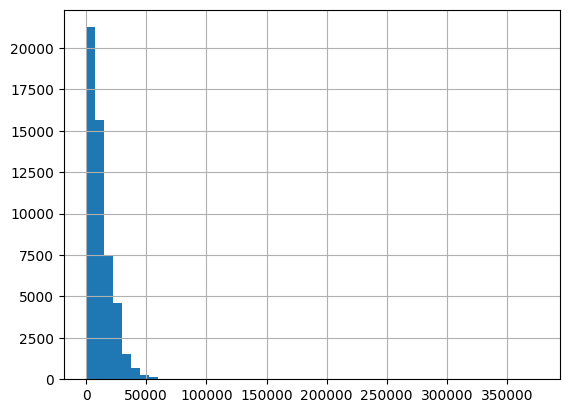

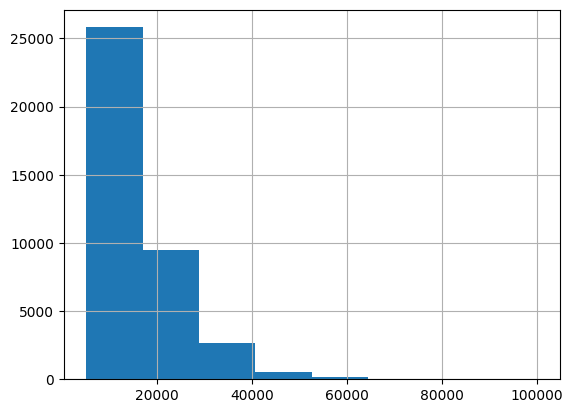

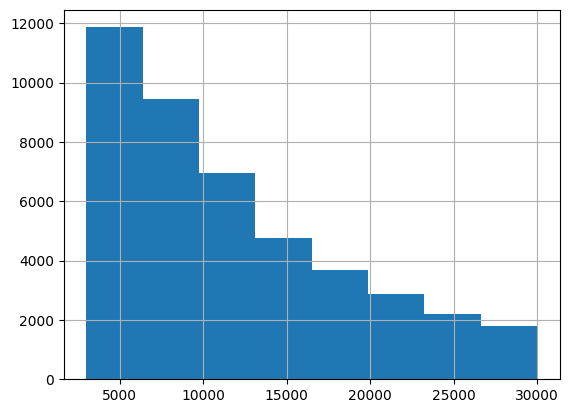

In [62]:
# Histograma para la columna 'price'

vehicles['price'].hist(bins=50)
plt.show()

vehicles['price'].hist(bins=8, range=(5000, 100000))
plt.show()

vehicles['price'].hist(bins=8, range=(3000, 30000))
plt.show()

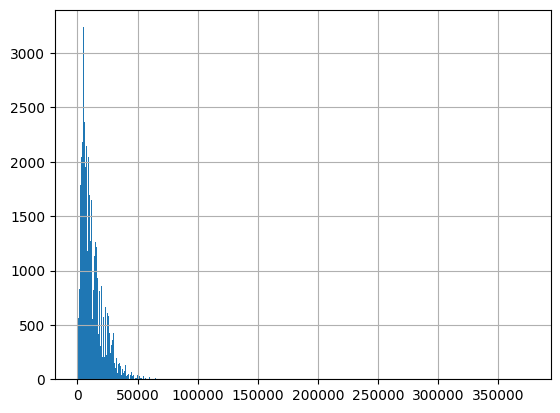

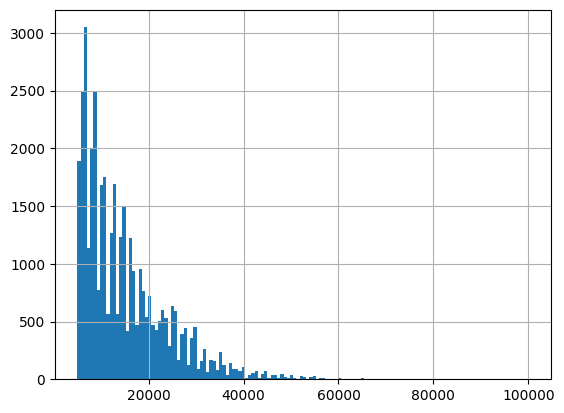

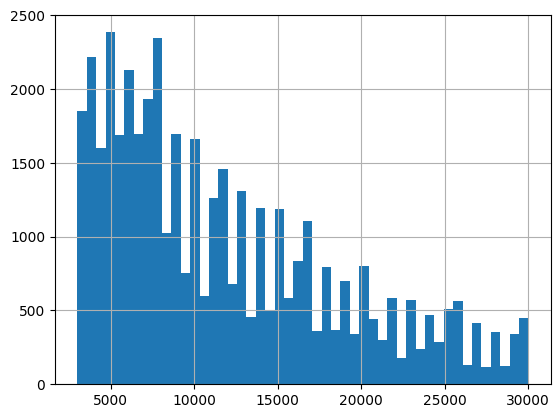

In [63]:
# Histograma para la columna 'price' con contenedores en automático

vehicles['price'].hist(bins='auto')
plt.show()

vehicles['price'].hist(bins='auto', range=(5000, 100000))
plt.show()

vehicles['price'].hist(bins='auto', range=(3000, 30000))
plt.show()

**Parámetro precio:** La distribución se encuentra sesgada a la derecha (y es positiva) y por lo tanto es asimétrica. Se observa que hay casi 2,000 vehículos con precio de 1 y también se puede observar que los valores arriba de 30,000 son poco frecuentes; rango propuesto de 2,000 - 30,000.

In [64]:
# Estos son los valores estadísticos de la columna 'age_when_posted'
vehicles['age_when_posted'].describe()

count    51525.000000
mean         8.469229
std          6.079773
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age_when_posted, dtype: float64

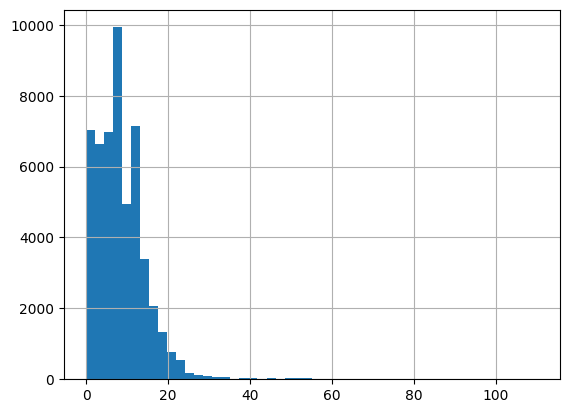

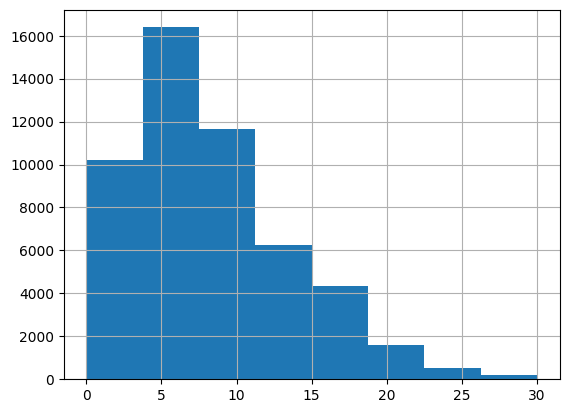

In [65]:
# Histograma para la columna 'age_when_posted'

vehicles['age_when_posted'].hist(bins=50)
plt.show()

vehicles['age_when_posted'].hist(bins=8, range=(0, 30))
plt.show()

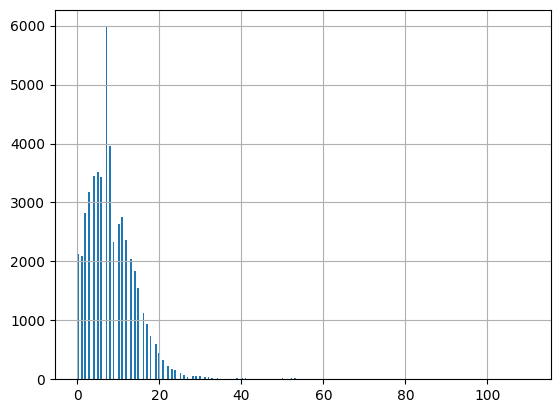

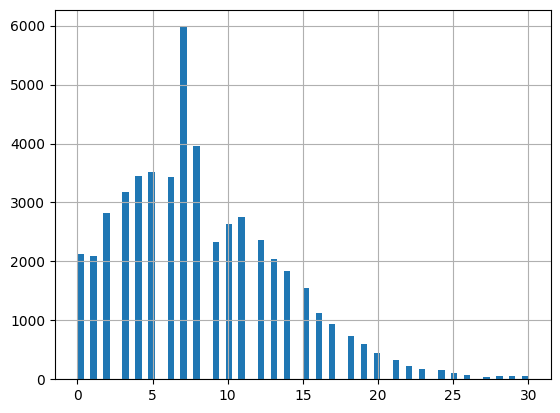

In [66]:
# Histograma para la columna 'price' con contenedores en automático

vehicles['age_when_posted'].hist(bins='auto')
plt.show()

vehicles['age_when_posted'].hist(bins='auto', range=(0, 30))
plt.show()

**Parámetro "años del vehículo cuando se colocó su anuncio":** La distribución de este parámetro muestra un sesgo positivo, lo que indica que está sesgada hacia la derecha. Se observa que hay poco más de 2,000 vehículos con un valor de cero, lo cual significa que fueron colocados en venta en la página poco después de ser adquiridos en la agencia de autos. Además, se puede notar que los valores por encima de 25 años son poco frecuentes.

Con base en estas observaciones, se propone un rango de 0 a 20 años para este parámetro, ya que abarca la mayoría de los vehículos anunciados y se ajusta mejor a la distribución de los datos.

In [67]:
# Estos son los valores estadísticos de la columna 'odometer'
vehicles['odometer'].describe()

count     51525.000000
mean     115553.391014
std       59902.205520
min           0.000000
25%       79181.000000
50%      115553.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

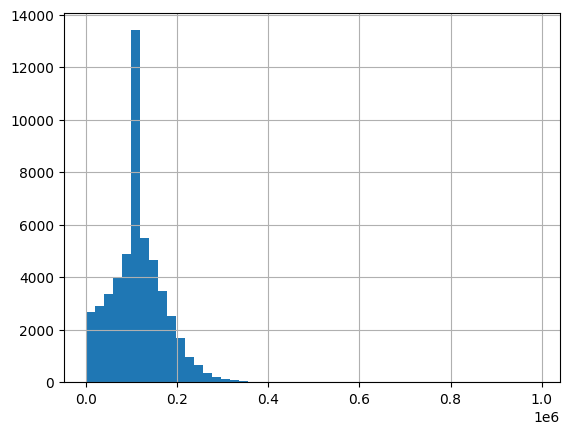

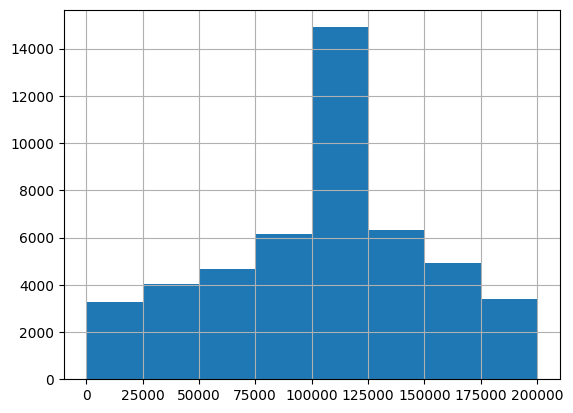

In [68]:
# Histograma para la columna 'odometer'

vehicles['odometer'].hist(bins=50)
plt.show()

vehicles['odometer'].hist(bins=8, range=(0, 200000))
plt.show()


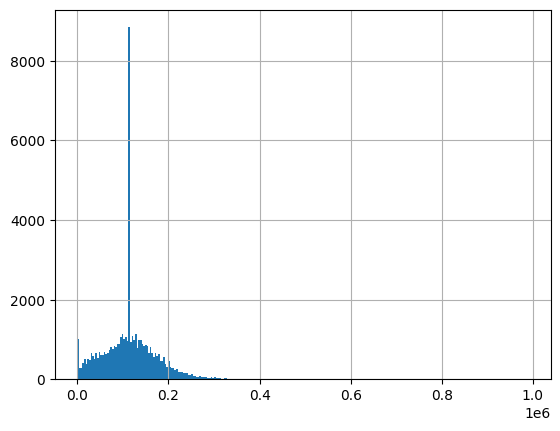

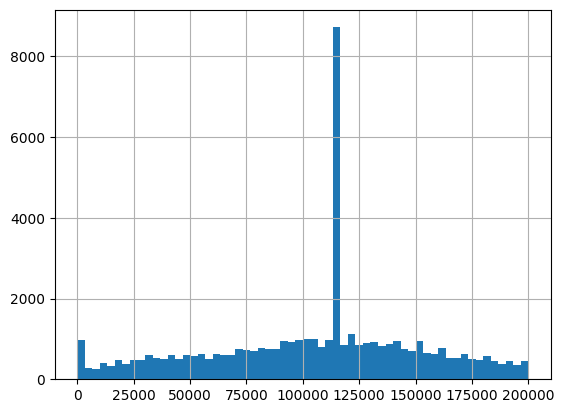

In [69]:
# Histograma para la columna 'odometer' con contenedores en automático

vehicles['odometer'].hist(bins='auto')
plt.show()

vehicles['odometer'].hist(bins='auto', range=(0, 200000))
plt.show()


**Parámetro millaje:** La distribución se encuentra relatívamente simétrica (con un pico muy alto). Se observan pocos vehículos con un millaje menor a los 22,000 y mayor a los 200,000; rango propuesto de 22,000 - 180,000.

In [70]:
# Estos son los valores estadísticos de la columna 'cylinders'
vehicles['cylinders'].describe()

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [71]:
# Comprobamos los valors únicos en esta columna conociendo de antemano que son pocos éstos

vehicles['cylinders'].unique()

array([ 6,  4,  8,  5, 10,  3, 12], dtype=int64)

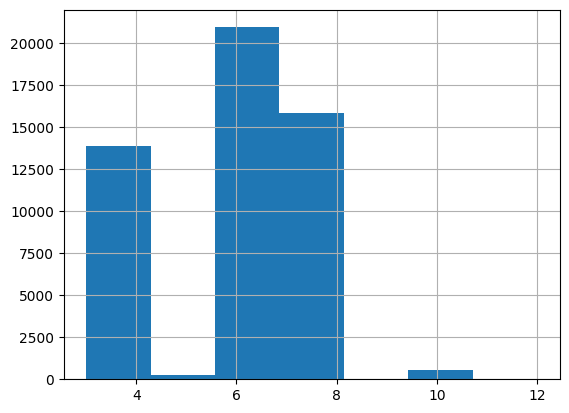

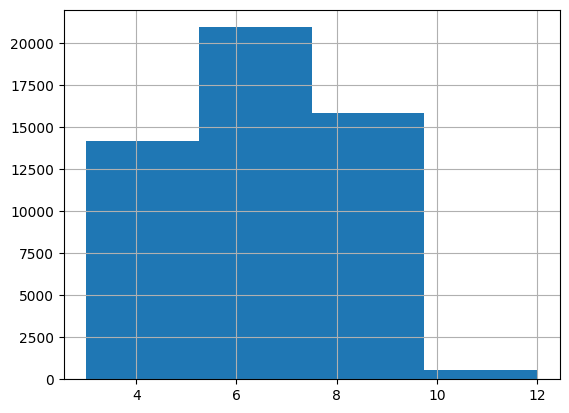

In [72]:
# Histograma para la columna 'cylinders'

vehicles['cylinders'].hist(bins=7)
plt.show()

vehicles['cylinders'].hist(bins=4, range=(3, 12))
plt.show()


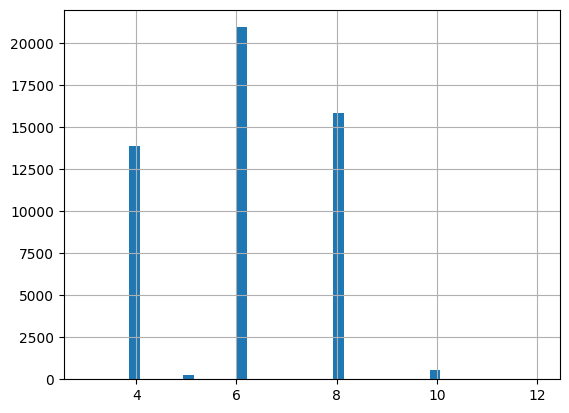

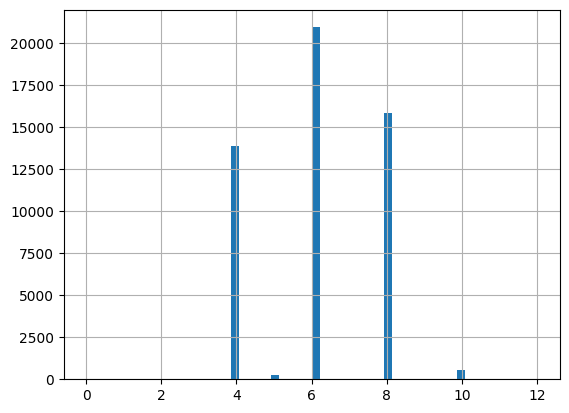

In [73]:
# Histograma para la columna 'cylinders' con contenedores en automático

vehicles['cylinders'].hist(bins='auto')
plt.show()

vehicles['cylinders'].hist(bins='auto', range=(0, 12))
plt.show()

**Parámetro número de cilíndros:** La distribución se encuentra relatívamente simétrica. Los valores únicos son pocos; rango propuesto de 4 - 8.

In [74]:
# Estos son los valores estadísticos de la columna 'condition_number'
vehicles['condition_number'].describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_number, dtype: float64

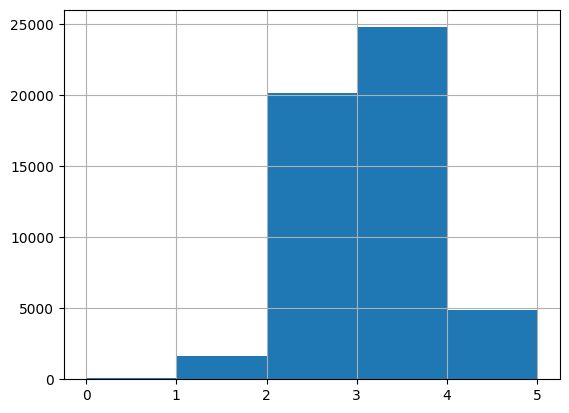

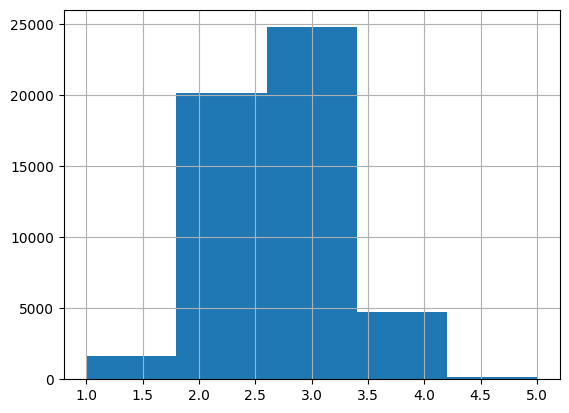

In [75]:
# Histograma para la columna 'condition_number' (la escala numérica es de 5 (nuevo) a  0 (para rescate))

vehicles['condition_number'].hist(bins=5)
plt.show()

vehicles['condition_number'].hist(bins=5, range=(1, 5))
plt.show()


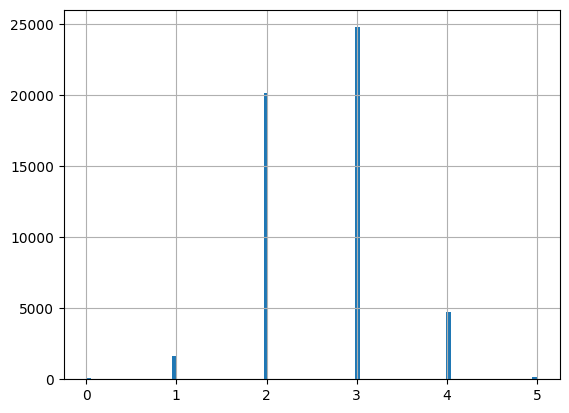

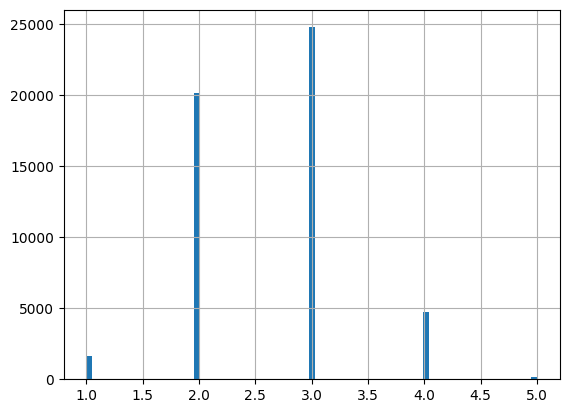

In [76]:
# Histograma para la columna 'condition_number' con contenedores en automático

vehicles['condition_number'].hist(bins='auto')
plt.show()

vehicles['condition_number'].hist(bins='auto', range=(1, 5))
plt.show()

**Parámetro condición del vehículo:** La distribución se encuentra relatívamente simétrica. Los valores únicos son pocos; rango propuesto de 1- 4.

## Estudio y tratamiento de valores atípicos

Con los resultados obtenidos en la sección anterior, se han identificado los valores atípicos tanto inferiores como superiores en el dataframe. En esta etapa del proyecto, se trabajará con estos valores extremos y se separarán del dataframe original. Para determinar de manera más precisa los valores atípicos, se utilizará el método intercuartílico.

El método intercuartílico se basa en la división de los datos en cuartiles. El primer cuartil representa el valor por debajo del cual se encuentra el 25% de los datos, el segundo cuartil corresponde al punto medio de los datos (el 50%), y así sucesivamente. El rango intercuartílico se calcula como la diferencia entre el tercer y primer cuartil de la distribución.

Este enfoque permite identificar y separar los valores atípicos de manera más precisa, ya que se toma en cuenta la distribución de los datos en lugar de simplemente considerar los valores extremos.

In [77]:
# Se realizará una función llamada "plot_boxplot"

def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

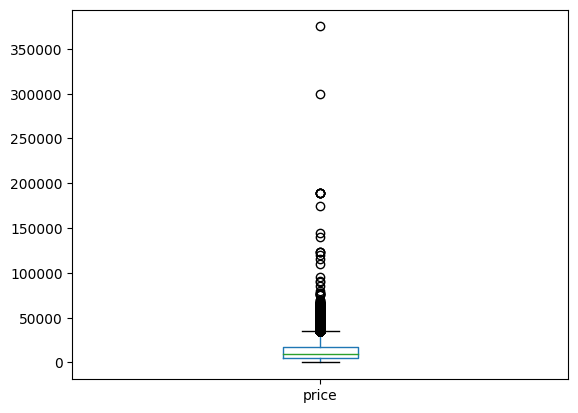

In [78]:
plot_boxplot(vehicles, 'price')

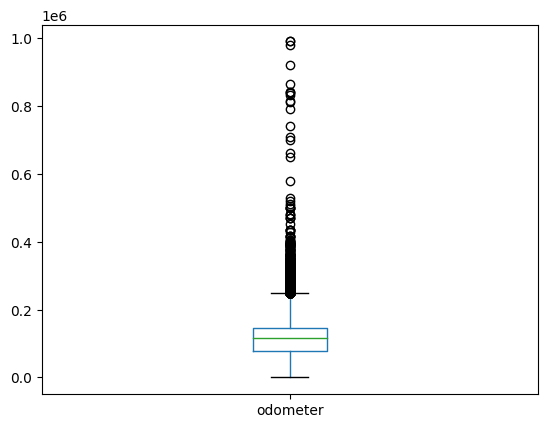

In [79]:
plot_boxplot(vehicles, 'odometer')

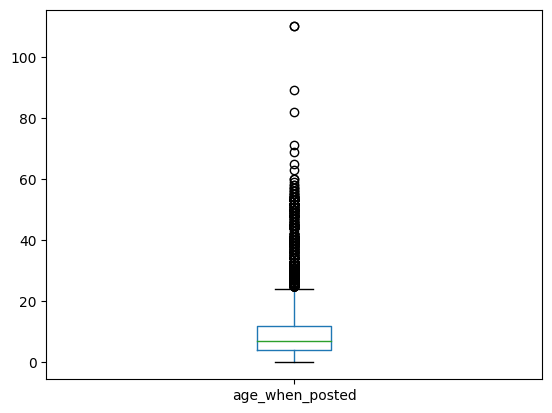

In [80]:
plot_boxplot(vehicles, 'age_when_posted')

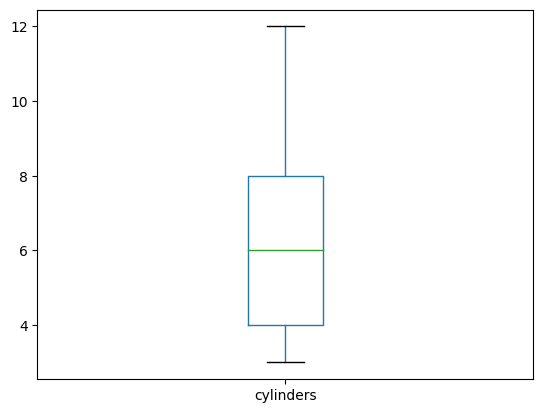

In [81]:
plot_boxplot(vehicles, 'cylinders')

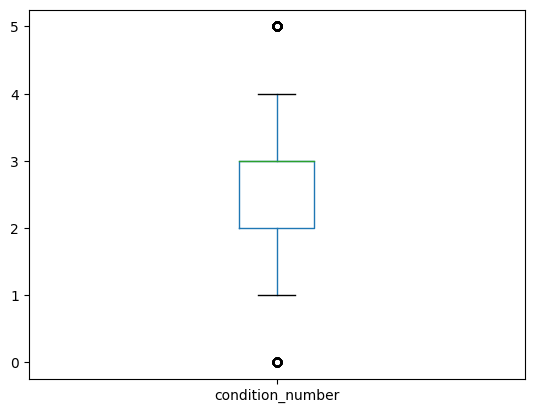

In [82]:
plot_boxplot(vehicles, 'condition_number')

In [83]:
# Removeremos los valores extremos

def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    return ls

In [84]:
index_list = []
for feature in ['price', 'odometer', 'age_when_posted', 'cylinders', 'condition_number']:
    index_list.extend(outliers(vehicles,feature))

In [85]:
index_list

[42,
 99,
 124,
 142,
 188,
 206,
 220,
 270,
 285,
 286,
 360,
 434,
 473,
 536,
 545,
 548,
 610,
 622,
 679,
 680,
 702,
 719,
 734,
 738,
 760,
 833,
 957,
 1007,
 1009,
 1064,
 1069,
 1119,
 1144,
 1164,
 1183,
 1259,
 1266,
 1270,
 1309,
 1326,
 1347,
 1355,
 1356,
 1382,
 1397,
 1404,
 1405,
 1442,
 1496,
 1523,
 1533,
 1549,
 1553,
 1587,
 1614,
 1620,
 1635,
 1641,
 1642,
 1647,
 1668,
 1688,
 1689,
 1702,
 1704,
 1711,
 1729,
 1735,
 1747,
 1748,
 1750,
 1820,
 1836,
 1838,
 1878,
 1891,
 1916,
 1923,
 2002,
 2011,
 2013,
 2017,
 2027,
 2037,
 2106,
 2114,
 2116,
 2193,
 2232,
 2253,
 2265,
 2291,
 2320,
 2333,
 2361,
 2364,
 2382,
 2407,
 2424,
 2462,
 2468,
 2473,
 2474,
 2477,
 2490,
 2492,
 2501,
 2509,
 2561,
 2565,
 2592,
 2595,
 2601,
 2608,
 2635,
 2645,
 2650,
 2663,
 2669,
 2677,
 2731,
 2790,
 2834,
 2862,
 2866,
 2867,
 2869,
 2945,
 2947,
 3016,
 3068,
 3086,
 3127,
 3166,
 3215,
 3239,
 3291,
 3318,
 3334,
 3416,
 3438,
 3462,
 3552,
 3569,
 3572,
 3624,
 3741,


In [86]:
def remove(df,ls):
    ls = sorted(set(ls))
    df= df.drop(ls)
    return df

In [87]:
vehicles_cleaned = remove(vehicles, index_list)

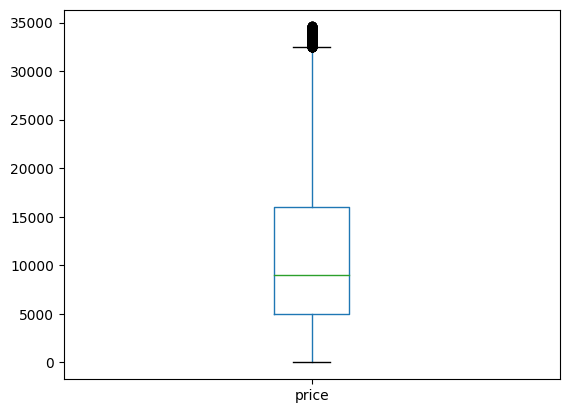

In [88]:
plot_boxplot(vehicles_cleaned,'price')

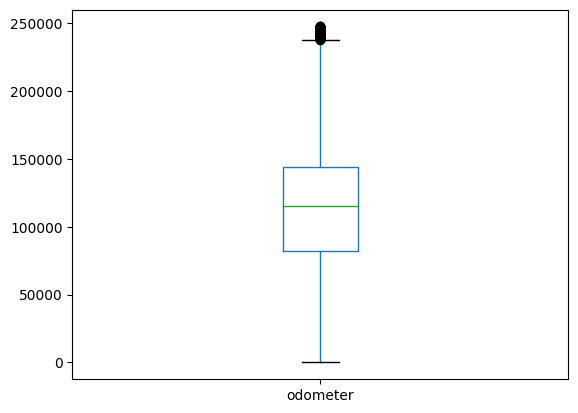

In [89]:
plot_boxplot(vehicles_cleaned,'odometer')

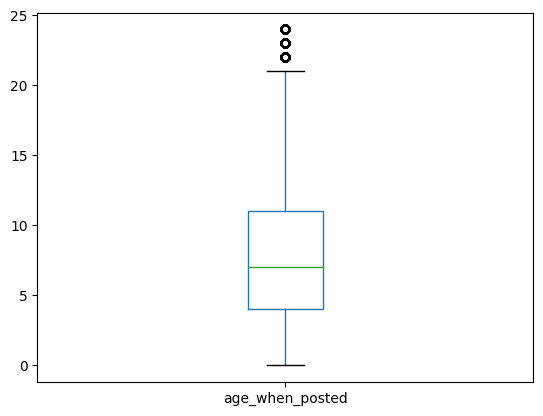

In [90]:
plot_boxplot(vehicles_cleaned,'age_when_posted')

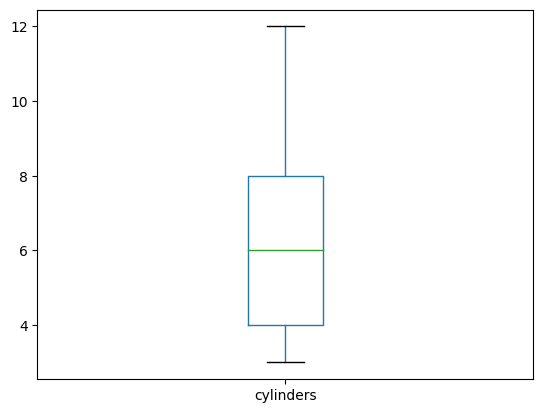

In [91]:
plot_boxplot(vehicles_cleaned,'cylinders')

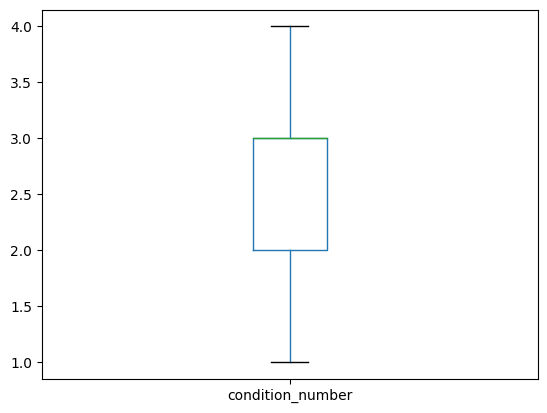

In [92]:
plot_boxplot(vehicles_cleaned,'condition_number')

In [93]:
vehicles_cleaned.to_csv('vehicles_cleaned.csv', index=False)

## Conclusión de la sección 

En esta sección, se ha creado una función para eliminar los valores atípicos utilizando el rango intercuartílico. Una vez eliminados los valores extremos, el dataframe está listo para ser estudiado y trabajado en la siguiente sección. En la siguiente etapa, se analizarán los parámetros principales que podrían tener un impacto en el precio del vehículo.

Con la eliminación de los valores atípicos, se espera obtener un conjunto de datos más limpio y representativo, lo que facilitará el análisis y la identificación de los factores clave que influyen en el precio del vehículo.

## Estudiar parámetros principales sin valores atípicos

En este apartado se mostarán los histogramas de los cinco parámetros principales a partir del dataframe principal (vehicles) y el nuevo dataframe sin valores extremos (vehicles_cleaned), es decir, por cada una de las cinco columnas de interés se mostrará en la parte superior el histograma con valores atípicos y en el inferior sin datos extremos.

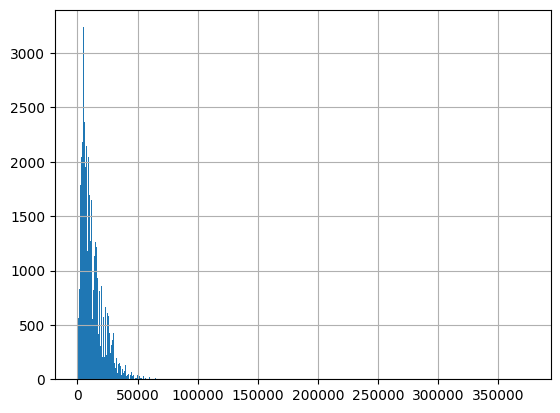

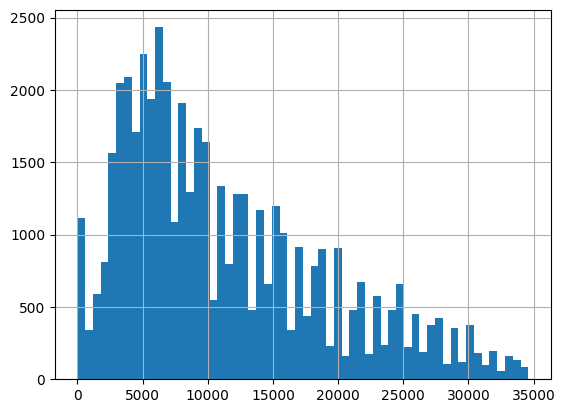

In [94]:
vehicles['price'].hist(bins='auto')
plt.show()

vehicles_cleaned['price'].hist(bins='auto')
plt.show()

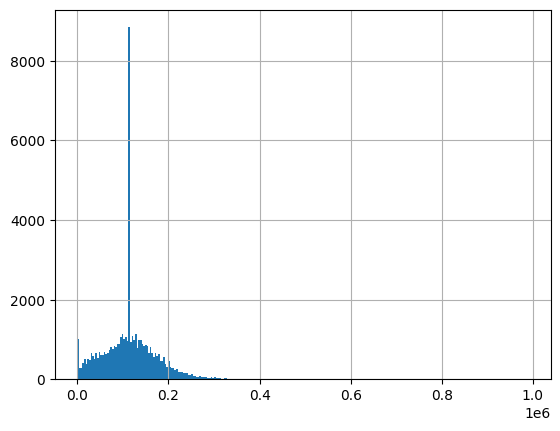

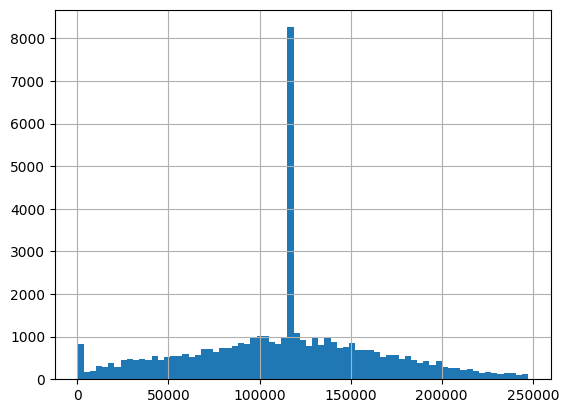

In [95]:
vehicles['odometer'].hist(bins='auto')
plt.show()

vehicles_cleaned['odometer'].hist(bins='auto')
plt.show()

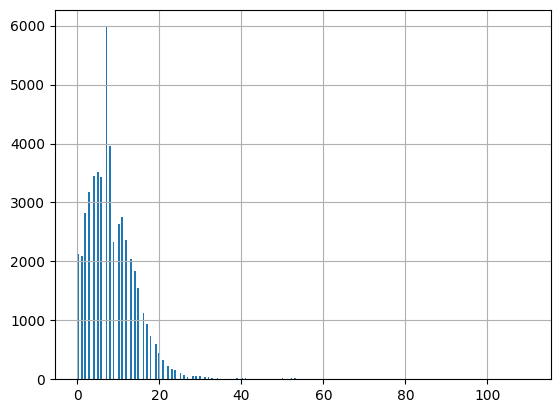

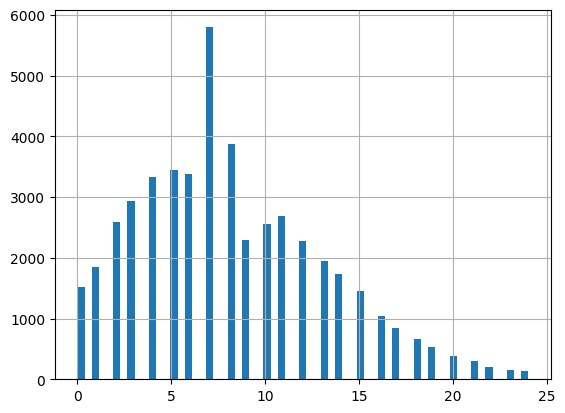

In [96]:
vehicles['age_when_posted'].hist(bins='auto')
plt.show()

vehicles_cleaned['age_when_posted'].hist(bins='auto')
plt.show()

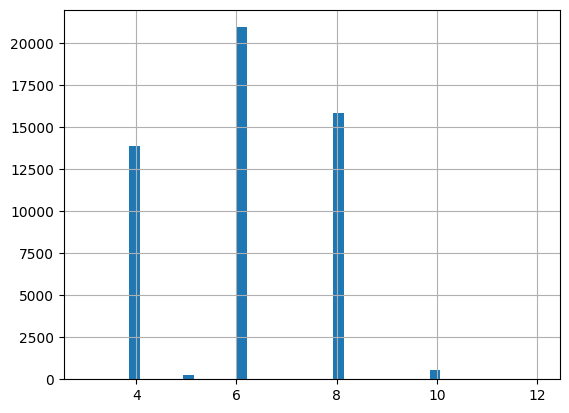

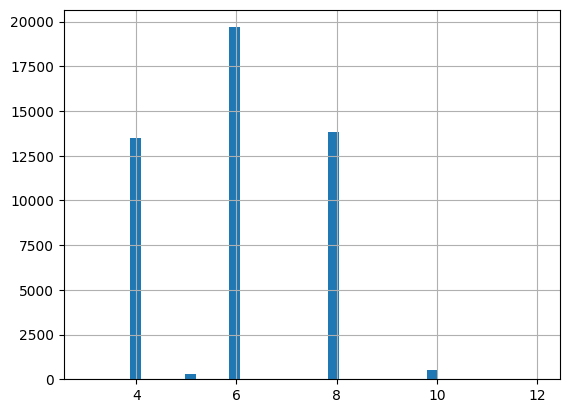

In [97]:
vehicles['cylinders'].hist(bins='auto')
plt.show()

vehicles_cleaned['cylinders'].hist(bins='auto')
plt.show()

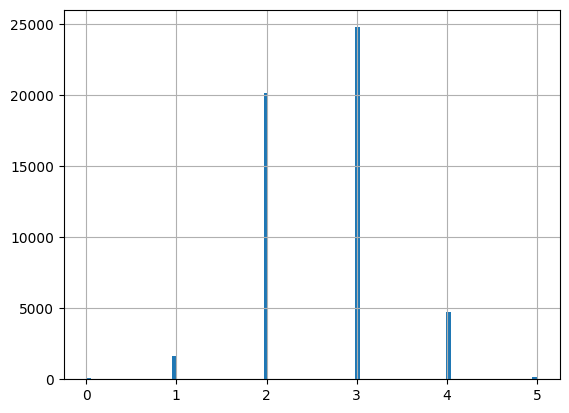

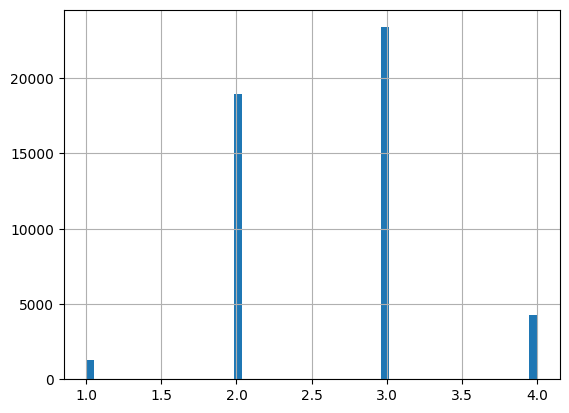

In [98]:
vehicles['condition_number'].hist(bins='auto')
plt.show()

vehicles_cleaned['condition_number'].hist(bins='auto')
plt.show()

Como se puede observar en cada par de gráficos, fue necesario eliminar los valores atípicos para evitar la distorsión del análisis del dataframe. En este sentido, las columnas 'cylinders' y 'condition_number' fueron las más sencillas de tratar, ya que tenían datos concentrados en unas pocas opciones. Por otro lado, las otras tres columnas, 'price', 'odometer' y 'age_when_posted', presentaban datos muy dispersos que podrían influir en los análisis posteriores.

Al eliminar los valores atípicos, se ha logrado obtener un conjunto de datos más limpio y representativo, lo que permitirá realizar análisis más precisos y significativos en las etapas posteriores del proyecto.

## Periodo de colocación de los anuncios

En este apartado se revisará cuántos días los anuncios fueron mostrados (`days_listed`). Se calculará la media y la mediana; así como la descripción del periodo de colocación habitual de un anuncio. Por último, se determinará cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.

In [99]:
vehicles_cleaned['days_listed'].describe()

count    47861.000000
mean        39.542153
std         28.228331
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

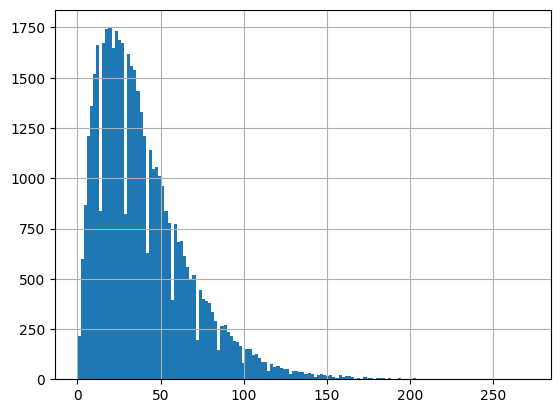

In [100]:
vehicles_cleaned['days_listed'].hist(bins='auto')
plt.show()

Como se observa en el histograma de arriba, la media en días de los anuncios publicados en Crankshaft List es de 39 y la mediana de 33. Por otra parte, el 75% de todos los anuncións tuvieron una duración entre 0 y 53 días. , mientras que la duración más longeva de un anunció fue de 271 días. 

## Precio promedio por cada tipo de vehículo

En este apartado se analizará el precio promedio por cada uno de los 13 diferentes tipos de vehículos ('type'). Así mismo, se identificarán los dos tipos de vehículos con mayor cantidad de anuncios en el sitio Crankshaft list.

In [101]:
price_type = vehicles_cleaned.pivot_table(index='type', values='price', aggfunc=['count', 'mean','median'])
price_type.columns = ['count', 'mean','median']
price_type.sort_values('count', ascending=False)

,count,mean,median
type,,,
sedan,11879,6993.594158,5995.0
SUV,11800,10496.363390,8897.5
truck,10983,15207.652645,14900.0
pickup,6204,15145.568182,14000.0
coupe,2016,13490.596230,12900.0
wagon,1483,9038.877276,7950.0
mini-van,1136,8070.660211,6500.0
hatchback,996,6860.989960,5995.0
van,576,8894.652778,7800.0


Según el conteo de anuncios, los 'sedan' (con 11,879 anuncios) y las 'SUV' (con 11,800) son los tipos de vehículos más anunciados.

<AxesSubplot:xlabel='median', ylabel='count'>

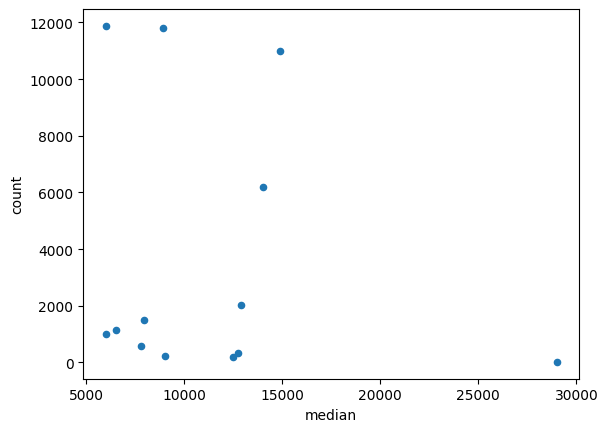

In [102]:
price_type.plot(x='median', y='count', kind='scatter')

<AxesSubplot:xlabel='mean', ylabel='count'>

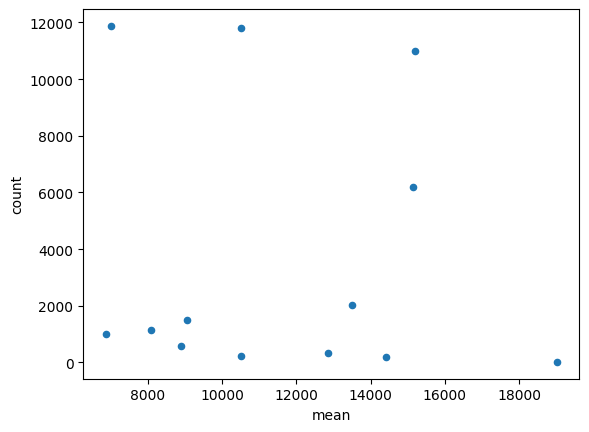

In [103]:
price_type.plot(x='mean', y='count', kind='scatter')

En una rápida vista sobre la gráfica de arriba, parece ser que no existe una correlación significativa entre la media y la mediana con el número de anuncios por tipo de vehículo.

## Factores de precio

En este último apartado del proyecto, se revisarán los dos modelos de carros más vendidos, sedán y SUV, y su correlación con diferentes variables, como la edad del vehículo, el millaje, la condición, el tipo de transmisión y el color.

Para comenzar, se realizará el análisis utilizando el dataframe limpio, donde se han eliminado los valores atípicos y se han tratado los datos faltantes. A continuación, se presentará la matriz de correlación para cada uno de los dos tipos de vehículos más vendidos.

Este análisis permitirá identificar qué factores tienen una mayor influencia en el precio de los sedanes y SUVs, y cómo se relacionan entre sí. La matriz de correlación proporcionará información sobre la fuerza y dirección de estas relaciones.

**Correlación del dataframe limpio**

Los siguientes mapas de calor de correlación de variables del dataframe muestran si existe una correlación negativa (abajo de 0), una positiva (mayor a 0) o bien si no hay relación lineal entre dos variables (cuando es 0 o se acerca a 0).  

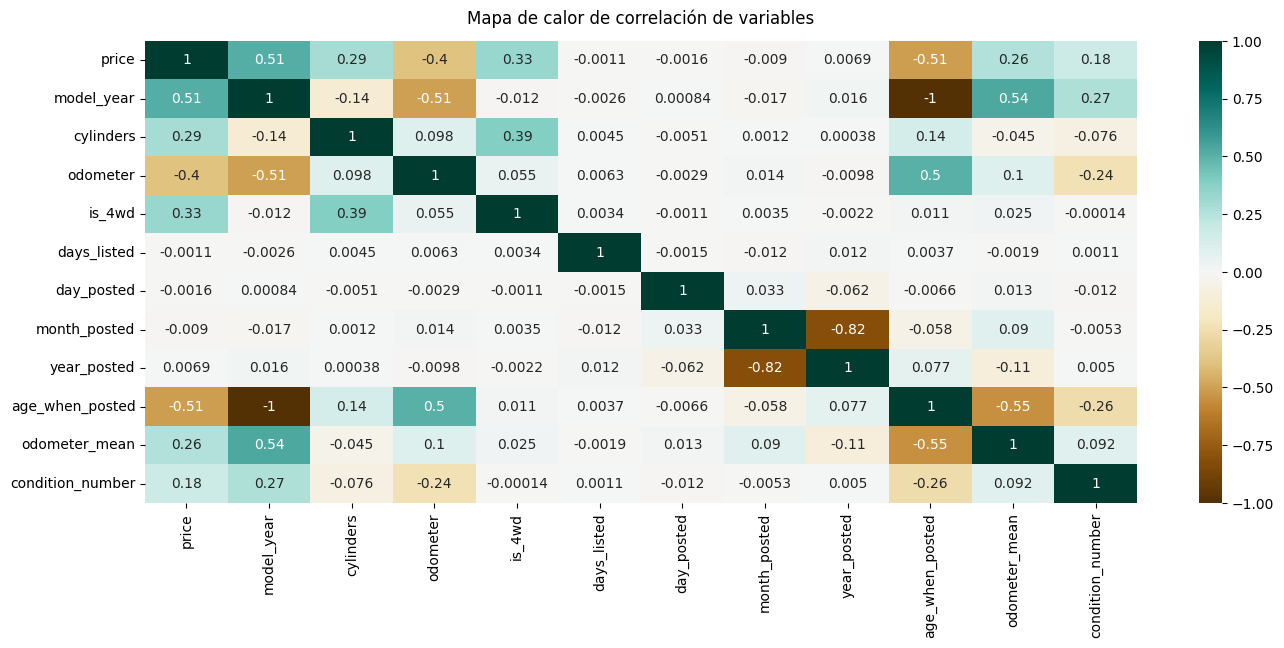

In [104]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(vehicles_cleaned.corr(), vmin=-1,vmax=1,annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de correlación de variables', fontdict={'fontsize':12},pad=12);

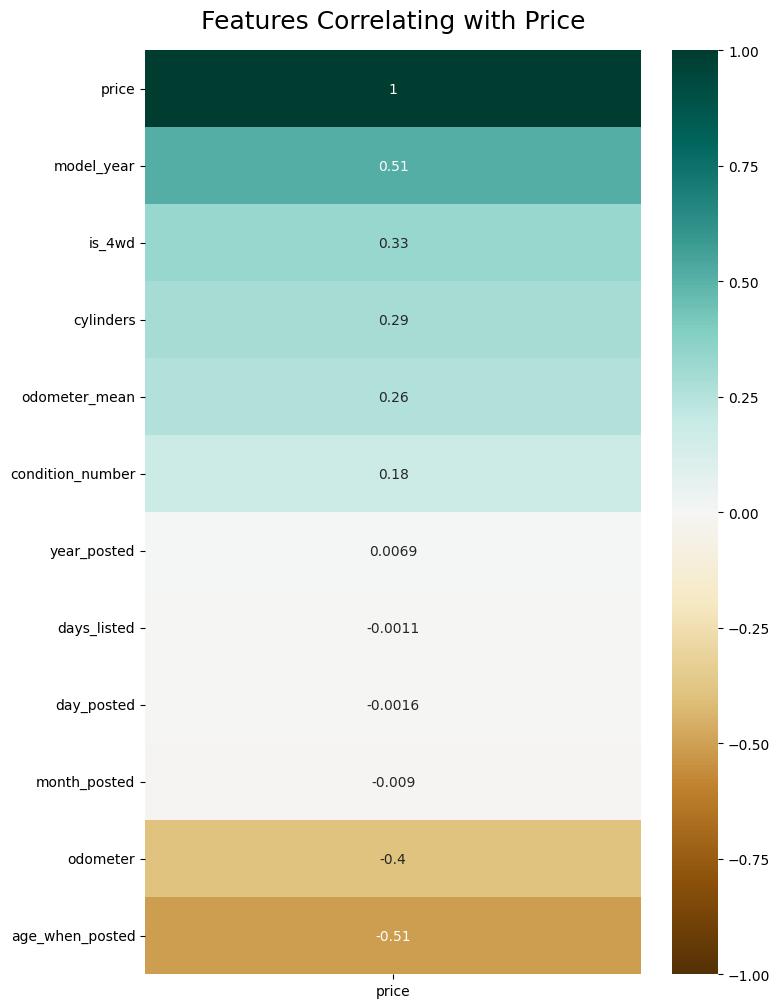

In [105]:
vehicles_cleaned.corr()[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(vehicles_cleaned.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

Al tomar como base la columna 'price' se puede observar que la correlación más fuerte es con la edad del vehículo ('model_year'), con la tracción en las cuatro llantas ('is_4wd), con el número de cilíndros ('cylinders'), con el promedio del millaje ('odometer_mean') y con la condición en que se encuentra el carro ('condition_number').

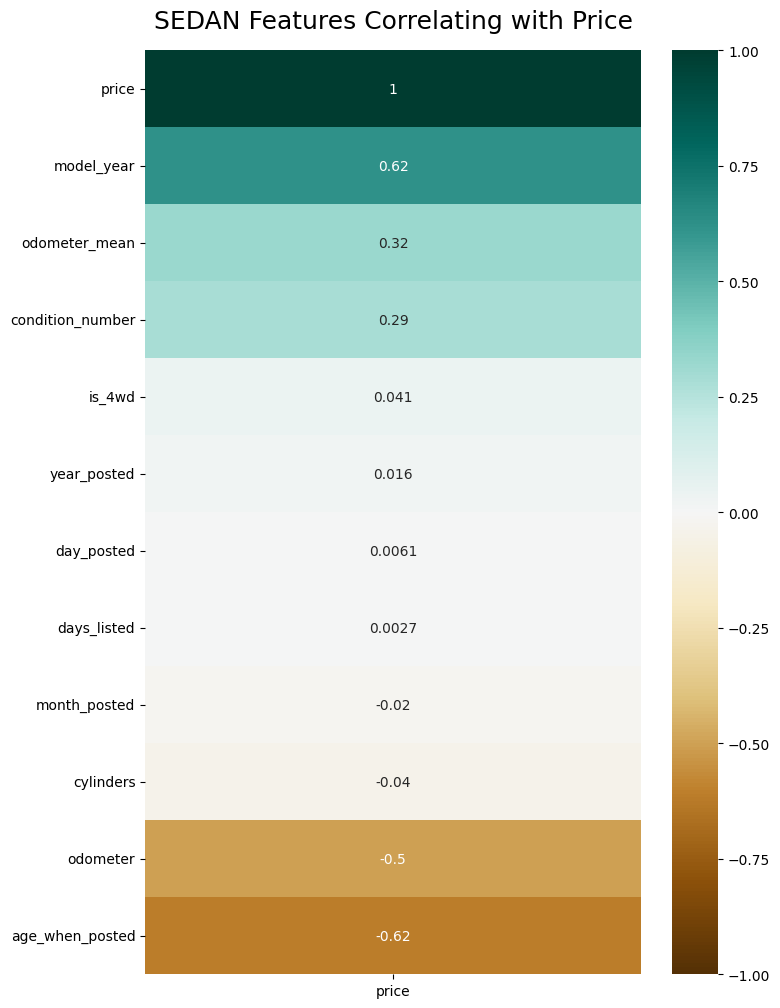

In [112]:
vehicles_cleaned[vehicles_cleaned.type == 'sedan'].corr()[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(vehicles_cleaned[vehicles_cleaned.type == 'sedan'].corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('SEDAN Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

Al tomar como base los autos **sedan** se puede observar que la correlación más fuerte con el precio es el año del modelo del vehículo (0.62), seguido de la media del millaje (0.32) y de la condición del carro (0.29). 

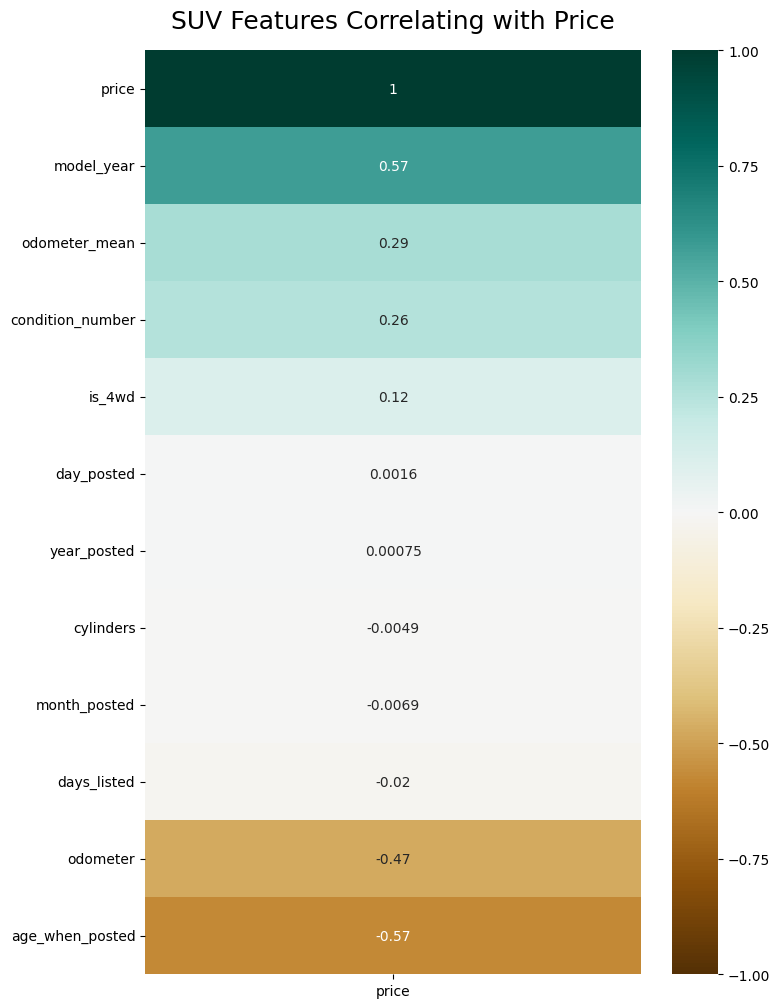

In [108]:
vehicles_cleaned[vehicles_cleaned.type == 'SUV'].corr()[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(vehicles_cleaned[vehicles_cleaned.type == 'SUV'].corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('SUV Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

Al tomar como base los autos **SUV** se puede observar que la correlación más fuerte con el precio es el año del modelo del vehículo (0.57), seguido de la media del millaje (0.29) y de la condición del carro (0.26). 

## Conclusión general

En conclusión, se determinó que los factores que más impactan positivamente en el precio de los vehículos son la edad del vehículo, su millaje y su condición. Estos tres factores tienen una correlación significativa con el precio de los carros.

## Otras conclusiones

- Durante el desarrollo del proyecto, se cargaron las librerías necesarias y se importó el dataframe para comenzar con la exploración inicial de los datos.

- Se eliminaron las columnas que no se utilizarían y se realizó un análisis detallado de cada columna, tratando los valores ausentes de manera adecuada.

- Se corrigieron los tipos de datos de las columnas cuando fue necesario, asegurando la consistencia y precisión de los datos.

- Se enriqueció el dataframe mediante la creación de nuevas columnas que permitieron un análisis más profundo y detallado de los datos.

- Se estudiaron los cinco parámetros principales del proyecto (precio, años del vehículo cuando se colocó el anuncio, millaje, número de cilindros y condición), realizando visualizaciones y análisis de los datos extremos con el método intercuartílico y eliminándolos utilizando una función específica.

- Se analizó el periodo de colocación de los anuncios, determinando que el promedio de duración fue de 39 días y la mediana de 33 días. También se identificó que los vehículos tipo sedán y SUV fueron los más anunciados.

- Finalmente, se examinaron las correlaciones entre las variables y se determinó que el año del modelo del vehículo, el millaje promedio y la condición del carro fueron los tres factores que presentaron una correlación más fuerte con el precio del vehículo.